In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#define project home dir
home_dir = "/Users/oyekanmiolatunde/Desktop/current_project/iise_dais_2022/feature_based/features_from_pyradiomics"
data_dir = os.path.join(home_dir ,"csv_files/radiomic_features_and_metadata_updated.tsv" )

#list folders in dir
radiomics_df = pd.read_csv(data_dir, sep="\t").iloc[:,1:]
radiomics_df.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,Course #,Lesion #,Lesion Location,duration_tx_to_imag (months),Fractions,mri_type,Diagnosis (Only want Mets),Primary Diagnosis,Age at Diagnosis,Gender
0,0.817102,0.685088,21.322901,31.124315,34.928498,36.674242,32.015621,39.051248,11556.208330,25.431732,...,1.0,1.0,R atrium,13.572133,5.0,0.0,Mets Ovary,Serous carcinoma,75.0,Female
1,0.776011,0.653935,5.647119,8.635595,8.062258,9.848858,9.486833,10.049876,209.583333,6.701316,...,1.0,2.0,L Temporal,13.572133,1.0,0.0,Mets Ovary,Serous carcinoma,75.0,Female
2,0.709839,0.542299,13.086607,24.131703,25.000000,20.808652,26.832816,27.221315,3421.708333,17.129623,...,1.0,1.0,RT Temporal,2.103188,1.0,0.0,Brain Mets Kidney,Squamous cell carcinoma,58.0,Male
3,0.778383,0.510895,5.701957,11.160729,10.770330,12.806248,11.401754,12.961481,354.208333,8.687321,...,1.0,1.0,Lt Temporal,33.453828,1.0,1.0,Brain Mets-Breast,Invasive ductal carcinoma,60.0,Female
4,0.844245,0.239728,3.325111,13.870346,13.000000,14.142136,15.652476,15.652476,353.583333,11.709969,...,1.0,1.0,Rt Occipital,25.336839,1.0,0.0,Brain Mets Kidney,Renal cell carcinoma,68.0,Female


In [4]:
features_from_original_img = [col for col in radiomics_df.columns if col.startswith("original")]
len(features_from_original_img)

105

In [5]:
features_from_original_img

['original_shape_Elongation',
 'original_shape_Flatness',
 'original_shape_LeastAxisLength',
 'original_shape_MajorAxisLength',
 'original_shape_Maximum2DDiameterColumn',
 'original_shape_Maximum2DDiameterRow',
 'original_shape_Maximum2DDiameterSlice',
 'original_shape_Maximum3DDiameter',
 'original_shape_MeshVolume',
 'original_shape_MinorAxisLength',
 'original_shape_Sphericity',
 'original_shape_SurfaceArea',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_VoxelVolume',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Mean',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared',
 'original

In [6]:
#separate the radiomics feature cols from the metadata columns
final_radiomic_features_df = radiomics_df[features_from_original_img]
final_radiomic_features_df.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.817102,0.685088,21.322901,31.124315,34.928498,36.674242,32.015621,39.051248,11556.208330,25.431732,...,1.199544,0.013606,0.054895,4.478895,0.001094,5.999978,0.000976,63.541665,0.038501,0.090595
1,0.776011,0.653935,5.647119,8.635595,8.062258,9.848858,9.486833,10.049876,209.583333,6.701316,...,4.954833,0.082067,0.098748,1.203803,0.023682,0.913686,0.031543,12.390484,0.029734,0.481863
2,0.709839,0.542299,13.086607,24.131703,25.000000,20.808652,26.832816,27.221315,3421.708333,17.129623,...,1.285590,0.023967,0.134176,10.910633,0.003604,3.098831,0.002687,114.461692,0.129565,0.199397
3,0.778383,0.510895,5.701957,11.160729,10.770330,12.806248,11.401754,12.961481,354.208333,8.687321,...,0.800534,0.023345,0.147412,6.399164,0.007729,0.437519,0.019064,51.741617,0.058781,1.146143
4,0.844245,0.239728,3.325111,13.870346,13.000000,14.142136,15.652476,15.652476,353.583333,11.709969,...,0.270197,0.034988,0.252418,11.609161,0.017496,0.612349,0.017974,85.510071,0.141551,0.765514


In [7]:
final_radiomic_features_df.shape

(231, 105)

In [8]:
metadata = radiomics_df.iloc[:,-16:]
metadata.drop(labels=["unique_pt_id","Course #","Lesion #","Lesion Location","No."], axis=1, inplace=True)
metadata.head()

,patient_id,course_num,lesion_location,lesion_num,duration_tx_to_imag (months),Fractions,mri_type,Diagnosis (Only want Mets),Primary Diagnosis,Age at Diagnosis,Gender
0,103,1,r atrium,1.0,13.572133,5.0,0.0,Mets Ovary,Serous carcinoma,75.0,Female
1,103,1,l temporal,2.0,13.572133,1.0,0.0,Mets Ovary,Serous carcinoma,75.0,Female
2,105,1,rt temporal,1.0,2.103188,1.0,0.0,Brain Mets Kidney,Squamous cell carcinoma,58.0,Male
3,114,1,lt temporal,1.0,33.453828,1.0,1.0,Brain Mets-Breast,Invasive ductal carcinoma,60.0,Female
4,115,1,rt occipital,1.0,25.336839,1.0,0.0,Brain Mets Kidney,Renal cell carcinoma,68.0,Female


In [9]:
metadata["Secondary Diagnosis"] = metadata["Diagnosis (Only want Mets)"].\
    apply(lambda x:"".join(x.replace("-","").strip().lower().split()))

metadata.head()

,patient_id,course_num,lesion_location,lesion_num,duration_tx_to_imag (months),Fractions,mri_type,Diagnosis (Only want Mets),Primary Diagnosis,Age at Diagnosis,Gender,Secondary Diagnosis
0,103,1,r atrium,1.0,13.572133,5.0,0.0,Mets Ovary,Serous carcinoma,75.0,Female,metsovary
1,103,1,l temporal,2.0,13.572133,1.0,0.0,Mets Ovary,Serous carcinoma,75.0,Female,metsovary
2,105,1,rt temporal,1.0,2.103188,1.0,0.0,Brain Mets Kidney,Squamous cell carcinoma,58.0,Male,brainmetskidney
3,114,1,lt temporal,1.0,33.453828,1.0,1.0,Brain Mets-Breast,Invasive ductal carcinoma,60.0,Female,brainmetsbreast
4,115,1,rt occipital,1.0,25.336839,1.0,0.0,Brain Mets Kidney,Renal cell carcinoma,68.0,Female,brainmetskidney


In [10]:
metadata["Secondary Diagnosis"] = metadata["Secondary Diagnosis"].replace(to_replace=["brainmet","brainmetslung/urothelial"],\
                                                                           value=["brainmetsmelanoma","brainmetsurothelial"])
metadata.drop(columns="Diagnosis (Only want Mets)", axis=1, inplace=True)
metadata.head()

,patient_id,course_num,lesion_location,lesion_num,duration_tx_to_imag (months),Fractions,mri_type,Primary Diagnosis,Age at Diagnosis,Gender,Secondary Diagnosis
0,103,1,r atrium,1.0,13.572133,5.0,0.0,Serous carcinoma,75.0,Female,metsovary
1,103,1,l temporal,2.0,13.572133,1.0,0.0,Serous carcinoma,75.0,Female,metsovary
2,105,1,rt temporal,1.0,2.103188,1.0,0.0,Squamous cell carcinoma,58.0,Male,brainmetskidney
3,114,1,lt temporal,1.0,33.453828,1.0,1.0,Invasive ductal carcinoma,60.0,Female,brainmetsbreast
4,115,1,rt occipital,1.0,25.336839,1.0,0.0,Renal cell carcinoma,68.0,Female,brainmetskidney


In [11]:
metadata.shape

(231, 11)

In [12]:
#metadata.to_csv("clinical_info.csv")

In [13]:
metadata["Primary Diagnosis"].value_counts()

Adenocarcinoma of the lung                             68
Melanoma                                               40
Renal cell carcinoma                                   36
ER- PR- HER2+ ductal carcinoma                         24
Adenocarcinoma of the lung, squamous cell carcinoma    16
Serous carcinoma                                        6
Invasive ductal carcinoma                               6
Urothelial carcinoma                                    4
Esophageal adenocarcinoma                               4
Carcinoma of the lung                                   3
Small cell carcinoma of lung                            3
Non-small cell carcinoma                                3
Adenocarcinoma of left breast                           3
Unspecified Breast Cancer                               3
Ductal carcinoma                                        2
Ovarian adenocarcinoma                                  2
Invasive ductal carcinoma of Rt Breast                  2
Adenocarcinoma

In [14]:
metadata[metadata["Secondary Diagnosis"]=="metsovary"]

,patient_id,course_num,lesion_location,lesion_num,duration_tx_to_imag (months),Fractions,mri_type,Primary Diagnosis,Age at Diagnosis,Gender,Secondary Diagnosis
0,103,1,r atrium,1.0,13.572133,5.0,0.0,Serous carcinoma,75.0,Female,metsovary
1,103,1,l temporal,2.0,13.572133,1.0,0.0,Serous carcinoma,75.0,Female,metsovary
112,103,2,rt frontal 11162018,3.0,5.389418,1.0,0.0,Serous carcinoma,75.0,Female,metsovary
113,103,2,rt sup frontal 11162018,4.0,5.389418,1.0,0.0,Serous carcinoma,75.0,Female,metsovary
114,103,2,r inf cerebellar,5.0,5.389418,1.0,0.0,Serous carcinoma,75.0,Female,metsovary
115,103,2,rt lat cerebellar,6.0,5.389418,1.0,0.0,Serous carcinoma,75.0,Female,metsovary


In [15]:
metadata["Secondary Diagnosis"].value_counts()

brainmetslung                88
brainmetsbreast              41
brainmetsmelanoma            40
brainmetsrenalcell           28
rccbrainmets                  7
metsovary                     6
brainmetsurothelial           4
brainmetpostopcavity          4
brainmetsesophageal           4
gkbrainmets2lesions           3
brainmetskidney               2
brainmetsovary                2
brainmetsendometrialca        1
breastwithlargefrontalmet     1
Name: Secondary Diagnosis, dtype: int64

**Can I group this into the following**

- Breast cancer
- Lung cancer
- Kidney cancer
- Melanona
- Colon cancer
- Others

In [16]:
# Visualizing embeddings
from sklearn.manifold import TSNE
import plotly.express as px
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [17]:
plot_data = final_radiomic_features_df.copy()
plot_data.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.817102,0.685088,21.322901,31.124315,34.928498,36.674242,32.015621,39.051248,11556.208330,25.431732,...,1.199544,0.013606,0.054895,4.478895,0.001094,5.999978,0.000976,63.541665,0.038501,0.090595
1,0.776011,0.653935,5.647119,8.635595,8.062258,9.848858,9.486833,10.049876,209.583333,6.701316,...,4.954833,0.082067,0.098748,1.203803,0.023682,0.913686,0.031543,12.390484,0.029734,0.481863
2,0.709839,0.542299,13.086607,24.131703,25.000000,20.808652,26.832816,27.221315,3421.708333,17.129623,...,1.285590,0.023967,0.134176,10.910633,0.003604,3.098831,0.002687,114.461692,0.129565,0.199397
3,0.778383,0.510895,5.701957,11.160729,10.770330,12.806248,11.401754,12.961481,354.208333,8.687321,...,0.800534,0.023345,0.147412,6.399164,0.007729,0.437519,0.019064,51.741617,0.058781,1.146143
4,0.844245,0.239728,3.325111,13.870346,13.000000,14.142136,15.652476,15.652476,353.583333,11.709969,...,0.270197,0.034988,0.252418,11.609161,0.017496,0.612349,0.017974,85.510071,0.141551,0.765514


In [18]:
plot_data.shape

(231, 105)

In [19]:
label_data = metadata['mri_type']
label_data.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: mri_type, dtype: float64

In [20]:
#define pca
pca = PCA(n_components=2, random_state=0)

#define the scaling function
scaling_fn = MinMaxScaler()  #StandardScaler()#
scaled_features = scaling_fn.fit_transform(plot_data)
scaled_features

array([[0.74356346, 0.68508821, 0.8819862 , ..., 0.35652167, 0.03248495,
        0.01354773],
       [0.68595116, 0.65393505, 0.23358363, ..., 0.06952094, 0.02508813,
        0.07205829],
       [0.59317332, 0.54229934, 0.54130564, ..., 0.64222544, 0.10932054,
        0.02981809],
       ...,
       [0.50296156, 0.57735027, 0.07399297, ..., 0.06226082, 0.14192571,
        0.41108411],
       [0.66012945, 0.49005584, 0.08760808, ..., 0.18036148, 0.12413878,
        0.77446599],
       [0.91073898, 0.84992058, 0.14199564, ..., 0.41648022, 0.14026671,
        0.8564717 ]])

In [21]:
pcs = pca.fit_transform(scaled_features)
pcs_df = pd.DataFrame(pcs, columns=["pc1","pc2"])
pcs_df= pcs_df.assign(label=label_data)
pcs_df.head()

,pc1,pc2,label
0,2.679127,0.493941,0.0
1,-0.065064,0.628527,0.0
2,2.432355,-0.841211,0.0
3,0.840892,-0.367310,1.0
4,1.157346,-1.194839,0.0


Text(0.5, 1.0, 'Plot first two PCS')

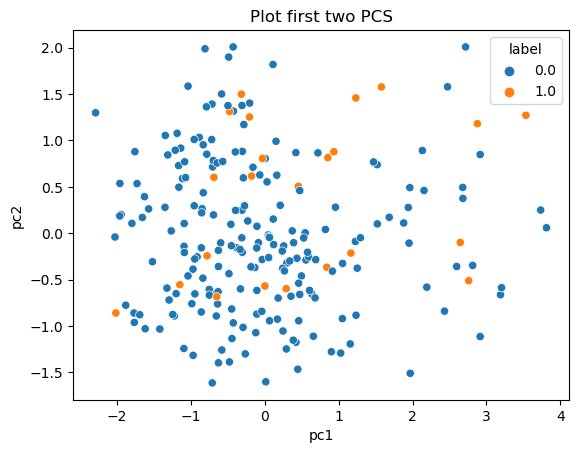

In [22]:
#plot the first two pcs
import seaborn as sns
sns.scatterplot(data=pcs_df, x="pc1", y="pc2", hue="label")
plt.title("Plot first two PCS")

In [23]:
umap_ = UMAP(n_neighbors=10,n_components=2,random_state=0)
tsne_ = TSNE(n_components=2,init="pca",learning_rate="auto",random_state=0)

proj_2d_umap= umap_.fit_transform(scaled_features)
proj_2d_tsne= tsne_.fit_transform(scaled_features)

mri_pcs_umap = pd.DataFrame(proj_2d_umap, columns=["pc1","pc2"])
mri_pcs_umap= mri_pcs_umap.assign(label=label_data)

mri_pcs_tsne = pd.DataFrame(proj_2d_tsne, columns=["pc1","pc2"])
mri_pcs_tsne= mri_pcs_tsne.assign(label=label_data)

Text(0.5, 0.98, 'Plot of first two PCs for the MRI')

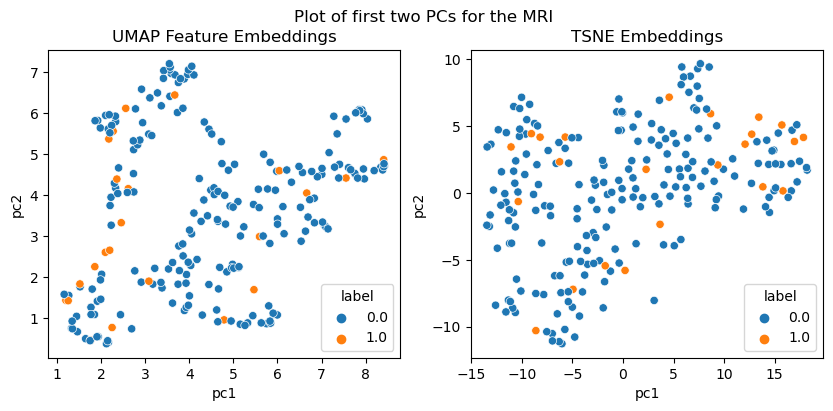

In [24]:
#plot MRI embeddings
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(data=mri_pcs_umap, x="pc1", y="pc2", hue="label")
plt.title("UMAP Feature Embeddings")

plt.subplot(1,2,2)
sns.scatterplot(data=mri_pcs_tsne, x="pc1", y="pc2", hue="label")
plt.title("TSNE Embeddings")
plt.suptitle("Plot of first two PCs for the MRI")

In [25]:
seed = 2#np.random.randint(0,100)
seed

2

In [26]:
#create training and testing dataset
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(final_radiomic_features_df, test_size=0.2, stratify=metadata[["mri_type","Gender"]], random_state=seed)

In [27]:
train_data.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
22,0.953802,5.565121e-01,5.105773e+00,9.174596,10.000000,10.440307,10.816654,11.000000,259.291667,8.750751,...,1.064224,0.022535,0.079558,2.735323,0.008179,0.542382,0.017181,34.313305,0.032720,1.748570
40,0.846792,7.441347e-01,5.940949e+00,7.983701,9.848858,7.810250,9.219544,9.899495,213.250000,6.760538,...,0.881100,0.035084,0.142920,4.079430,0.012300,0.570750,0.032274,33.579001,0.069647,0.907276
219,0.868471,4.957296e-01,1.115198e+01,22.496099,25.612497,23.194827,24.515301,28.000000,2475.416667,19.537209,...,5.388778,0.057891,0.063625,1.606028,0.005396,6.853129,0.003342,22.166824,0.035220,0.090492
46,0.644773,1.632474e-01,2.913374e+00,17.846371,15.132746,15.132746,19.416488,19.416488,305.666667,11.506857,...,2.174379,0.117069,0.267556,15.880205,0.024188,0.815420,0.023436,165.312144,0.187165,2.421062
88,0.577289,3.259757e-16,1.776357e-15,5.449354,3.000000,5.000000,5.385165,5.385165,20.193713,3.145851,...,2.777242,0.439623,0.317460,3.043651,0.096488,0.501100,0.303680,9.726864,0.224502,3.472913


In [28]:
test_data.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
201,0.942123,0.832703,8.990636,10.796926,12.649111,12.529964,12.649111,13.038405,700.000000,10.172033,...,18.480025,0.184554,0.036308,0.175531,0.018786,11.998458,0.010429,2.766063,0.051915,0.042930
152,0.815576,0.522834,1.547730,2.960272,3.162278,3.162278,3.162278,3.316625,6.500000,2.414327,...,22.373457,0.817901,0.252298,1.474521,0.070200,1.285714,0.350000,2.338790,0.097002,1.583838
10,0.571449,0.517464,3.451304,6.669646,6.708204,6.708204,5.000000,7.000000,53.833333,3.811360,...,0.503347,0.073600,0.300972,5.958076,0.044135,0.240601,0.091092,43.002229,0.219101,2.714781
224,0.734243,0.619507,1.654453,2.670595,3.000000,3.162278,2.236068,3.162278,4.708333,1.960865,...,6.392857,0.678571,0.124008,0.266865,0.088294,3.950000,0.443038,0.644898,0.155685,0.449438
63,0.793380,0.723895,19.138478,26.438198,26.683328,27.856777,30.463092,30.870698,7226.791667,20.975533,...,1.867147,0.039431,0.072739,2.332262,0.005739,13.094312,0.001168,35.964908,0.068164,0.038964


In [29]:
train_label = metadata.loc[train_data.index]
test_label = metadata.loc[test_data.index]

In [30]:
train_data.shape, train_label.shape

((184, 105), (184, 11))

In [31]:
test_data.shape, test_label.shape

((47, 105), (47, 11))

In [32]:
train_label.mri_type.value_counts()

0.0    166
1.0     18
Name: mri_type, dtype: int64

In [33]:
test_label.mri_type.value_counts()

0.0    42
1.0     5
Name: mri_type, dtype: int64

In [34]:
#perform feature scaling
train_features_scaled = scaling_fn.fit_transform(train_data)
test_features_scaled= scaling_fn.transform(test_data)

In [35]:
train_scaled = pd.DataFrame(train_features_scaled, columns=train_data.columns)
test_scaled = pd.DataFrame(test_features_scaled, columns=train_data.columns)

In [36]:
test_scaled.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.918852,0.832703,0.379867,0.185460,0.242625,0.224628,0.214598,0.212994,0.034933,0.292161,...,0.195814,0.179455,0.019706,0.004246,0.047901,0.614432,9.871361e-09,0.015520,0.043803,0.006420
1,0.741425,0.522834,0.065394,0.020245,0.026481,0.024794,0.023422,0.021306,0.000250,0.038523,...,0.237512,0.816763,0.316381,0.070483,0.184434,0.065840,3.494424e-07,0.013123,0.081845,0.236849
2,0.399140,0.517464,0.145823,0.098447,0.107270,0.100437,0.060455,0.093932,0.002617,0.084199,...,0.003285,0.067808,0.383236,0.299106,0.115218,0.012321,9.053421e-08,0.241278,0.184866,0.405971
3,0.627389,0.619507,0.069903,0.014138,0.022784,0.024794,0.004757,0.018262,0.000161,0.023697,...,0.066361,0.676562,0.140167,0.008903,0.232483,0.202276,4.424803e-07,0.003618,0.131359,0.067209
4,0.710304,0.723895,0.808628,0.515215,0.562376,0.551583,0.573579,0.564599,0.361351,0.645381,...,0.017891,0.033425,0.069746,0.114221,0.013253,0.670550,6.104718e-10,0.201793,0.057513,0.005827


In [37]:
train_scaled.shape

(184, 105)

In [38]:
train_label.mri_type.value_counts()

0.0    166
1.0     18
Name: mri_type, dtype: int64

In [39]:
umap_ = UMAP(n_neighbors=10,n_components=2,random_state=0)
#tsne_ = TSNE(n_components=2,init="pca",learning_rate="auto",random_state=0)

proj_2d_umap= umap_.fit_transform(train_scaled)
#proj_2d_tsne= tsne_.fit_transform(train_scaled)

mri_pcs_umap = pd.DataFrame(proj_2d_umap, columns=["pc1","pc2"])
mri_pcs_umap= mri_pcs_umap.assign(label=train_label.mri_type.values)

#

Text(0.5, 1.0, 'UMAP Feature Embeddings')

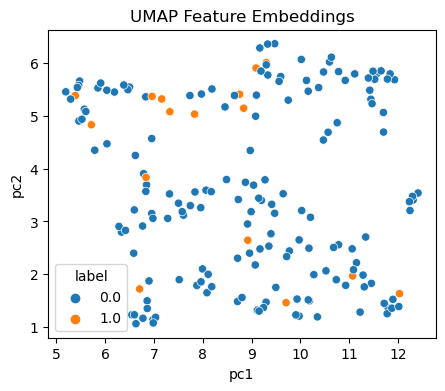

In [44]:
#plot MRI embeddings
plt.figure(figsize=(5,4))
#plt.subplot(1,2,1)
sns.scatterplot(data=mri_pcs_umap, x="pc1", y="pc2", hue="label")
plt.title("UMAP Feature Embeddings")

# plt.subplot(1,2,2)
# sns.scatterplot(data=mri_pcs_tsne, x="pc1", y="pc2", hue="label")
# plt.title("TSNE Embeddings")
# plt.suptitle("Plot of first two PCs for the MRI")

In [85]:
#perform PCA on the training and select the appropriate PCS
pca = PCA(random_state=0)

pca.fit_transform(train_scaled)

array([[ 4.42257302e-01,  2.13033464e-01,  9.56311587e-01, ...,
        -1.14750531e-05,  7.38087973e-13, -6.60266571e-12],
       [ 5.70453495e-01, -3.24322850e-01,  1.31363082e-01, ...,
         3.58497892e-06, -1.19639973e-11, -3.34099735e-12],
       [ 9.37267243e-01,  1.01494045e+00, -3.02612687e-01, ...,
         1.25764359e-05,  9.24503523e-12,  3.23461986e-12],
       ...,
       [-7.00930321e-01,  7.53499406e-01, -9.28011959e-02, ...,
         2.36182028e-05,  1.43868491e-13,  6.16493163e-12],
       [ 1.16580339e+00, -7.51561066e-01,  9.43497746e-02, ...,
         2.79385563e-05,  9.89641378e-12,  3.57471828e-12],
       [ 3.51104256e-02, -7.86217427e-01, -2.09373469e-01, ...,
        -5.64256480e-06,  3.55021356e-12,  6.52448716e-12]])

In [86]:
pca.explained_variance_ratio_[:10].sum()

0.9323159436090833

Text(0.5, 1.0, 'Scree Plot')

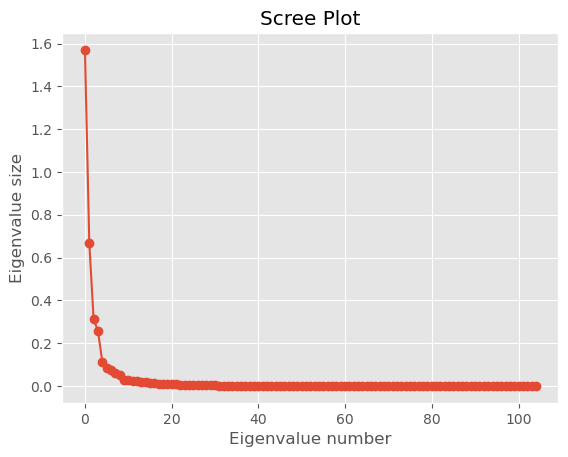

In [87]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, LeaveOneOut, RandomizedSearchCV, StratifiedKFold
#create a pipeline of preprocessing steps
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
#https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python
#https://neptune.ai/blog/lightgbm-parameters-guide

In [89]:
# X=train_data.reset_index(drop=True)
# Y= train_label.mri_type.reset_index(drop=True)

In [90]:
# X.shape, Y.shape

### Model Selections ###

In [91]:
kfold= StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.metrics import roc_curve,auc,accuracy_score,f1_score, confusion_matrix, classification_report
from scipy.stats import randint
# from sklearn.metrics import SCORERS
# print("\n".join(sorted(SCORERS.keys())))

## Using only Radiomic Features ##

#### 1. Logistic Regression ####

**1.1. Using All Features**

#https://www.kaggle.com/code/ilialar/hyperparameters-tunning-with-hyperopt

In [92]:
def tune_LOGREG(X_train, y_train,params, max_evals,cv=kfold,random_state=seed):

    def train_LOGREG(params):
    
        params_ = {'C': params['C'],
                #'solver':params['solver'],
                #'penalty':params['penalty']
                }
                
        model_=LogisticRegression(**params_, class_weight="balanced",\
                                    max_iter=10000,random_state=random_state)
            
        scores = cross_validate(model_,X_train,y_train, cv=cv, \
                                    scoring=("roc_auc"),return_train_score=True\
                                        ,return_estimator=True, n_jobs=-1)
            
        #get the mean for all k folds acc
        mean_scores = -1 *scores["test_score"].mean()

        return mean_scores

    trials= Trials()

    #get best hyperparams
    best_params= fmin(fn=train_LOGREG,
                space= params,
                algo= tpe.suggest,
                max_evals = max_evals,
                trials= trials,
                rstate=np.random.default_rng(random_state)
                )
    
    return best_params, trials

In [95]:
from hyperopt import hp, fmin, tpe,Trials,STATUS_OK

y_train = train_label.mri_type
max_evals=1500
#specify hyperopt params
logreg_space={'C': hp.uniform("C",0.01,100),
              #'solver':hp.choice("solver",['newton-cg', 'liblinear']),
              #'penalty':hp.choice("penalty",["l1","l2","elasticnet","None"])
              }

In [919]:
get_logreg_params_all, trial_logreg_all = tune_LOGREG(X_train=train_scaled, \
    y_train=y_train,params=logreg_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:22<00:00, 45.36trial/s, best loss: -0.6434046345811052]


In [920]:
logreg_best_params = get_logreg_params_all.copy()
logreg_best_params

{'C': 0.012699981782376309}

In [921]:
# [x['misc']['vals'] for x in trials_logreg]

**Visualize parameter sampling and corresponding AUC during tuning**

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

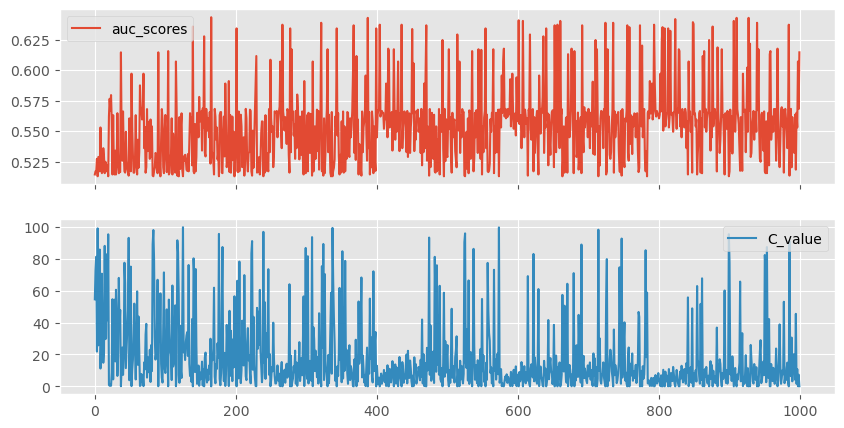

In [922]:
logreg_tpe_results=np.array([[-1*x['result']['loss'],x['misc']['vals']['C'][0]]for x in trial_logreg_all.trials])
logreg_tpe_results_df=pd.DataFrame(logreg_tpe_results, columns=["auc_scores","C_value"])
logreg_tpe_results_df.plot(subplots=True,figsize=(10, 5))

**Retrain with best hyperparams and make inference**

In [923]:
#retrain with all training 
#logreg_best_params = {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
retrain_logreg = LogisticRegression(**logreg_best_params,class_weight="balanced",\
                                    n_jobs=-1, max_iter=10000, random_state=seed)
retrain_logreg.fit(train_scaled, y_train)

LogisticRegression(C=0.012699981782376309, class_weight='balanced',
                   max_iter=10000, n_jobs=-1, random_state=50)

In [924]:
# import sklearn
# sklearn.metrics.get_scorer_names()

**Make Predictions**

In [925]:
logreg_train_prob = retrain_logreg.predict_proba(train_scaled)
#roc_auc_score(y_train, logreg_train_prob[:,1])

In [926]:
y_test = test_label.mri_type

In [927]:
#make predictions
logreg_test_pred = retrain_logreg.predict(test_scaled)
logreg_test_prob =  retrain_logreg.predict_proba(test_scaled)
#roc_auc_score(y_test, logreg_test_prob[:,1])

In [928]:
print (f"LOGREG Train AUC All Features: {roc_auc_score(y_train, logreg_train_prob[:,1])}")
print (f"LOGREG Test AUC All Features : {roc_auc_score(y_test, logreg_test_prob[:,1])}")

LOGREG Train AUC All Features: 0.674698795180723
LOGREG Test AUC All Features : 0.8333333333333333


In [929]:
confusion_matrix(y_test,logreg_test_pred)

array([[33,  9],
       [ 1,  4]])

In [930]:
print(classification_report(y_test,logreg_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87        42
         1.0       0.31      0.80      0.44         5

    accuracy                           0.79        47
   macro avg       0.64      0.79      0.66        47
weighted avg       0.90      0.79      0.82        47



**1.2: Logistic Regression+PCA**

In [931]:
train_data.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
124,0.813619,0.340390,2.821208,8.288157,9.055385,8.246211,9.433981,9.433981,105.333333,6.743405,...,0.555022,0.028523,0.125024,5.273164,0.012313,0.201822,0.066540,32.736880,0.084696,2.559622
147,1.000000,0.527046,1.690309,3.207135,3.162278,3.605551,3.162278,3.741657,10.916667,3.207135,...,5.053571,0.327381,0.196476,0.476382,0.152955,0.590402,0.370510,1.564868,0.069184,0.744231
214,0.898513,0.833487,5.189655,6.226441,7.211103,7.071068,7.211103,7.483315,122.458333,5.594537,...,0.900749,0.091250,0.188248,2.545002,0.049566,0.715561,0.054963,23.795483,0.147466,1.020735
69,0.836746,0.729937,2.675676,3.665627,4.123106,4.472136,3.605551,4.472136,19.875000,3.067200,...,2.040990,0.263816,0.245854,2.085845,0.095104,0.396635,0.201347,9.003177,0.131681,1.487774
200,0.804934,0.644450,16.602512,25.762315,26.925824,29.410882,26.400758,30.033315,6053.666667,20.736960,...,3.352922,0.034936,0.029603,0.902114,0.002172,8.009142,0.002004,21.334819,0.027302,0.069760


In [932]:
col_transform=make_pipeline(MinMaxScaler(),PCA(n_components=10))
X_train_pca= col_transform.fit_transform(train_data)
X_test_pca= col_transform.transform(test_data)

# retrain_logreg_pca = LogisticRegression(**logreg_best_params_pca,class_weight="balanced",\
#                                         n_jobs=-1, max_iter=10000, random_state=seed)
# retrain_logreg_pca.fit(X_train_pca, y_train)

In [933]:
get_logreg_params_pca, trial_logreg_pca = tune_LOGREG(X_train=X_train_pca, \
    y_train=y_train,params=logreg_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:10<00:00, 95.96trial/s, best loss: -0.6534462269756387]


In [934]:
logreg_best_params_pca = get_logreg_params_pca.copy()
logreg_best_params_pca

{'C': 0.011259448700348711}

In [935]:
#retrain with all training 
#logreg_best_params1 = {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
retrain_logreg_pca = LogisticRegression(**logreg_best_params_pca,class_weight="balanced",\
                                        n_jobs=-1, max_iter=10000, random_state=seed)
retrain_logreg_pca.fit(X_train_pca, y_train)

LogisticRegression(C=0.011259448700348711, class_weight='balanced',
                   max_iter=10000, n_jobs=-1, random_state=50)

In [936]:
#make predictions
logreg_test_pred_pca = retrain_logreg_pca.predict(X_test_pca)
logreg_train_prob_pca = retrain_logreg_pca.predict_proba(X_train_pca)
logreg_test_prob_pca =  retrain_logreg_pca.predict_proba(X_test_pca)
roc_auc_score(y_test, logreg_test_prob_pca[:,1])

0.8333333333333333

In [937]:
print (f"LOGREG Train AUC PCA: {roc_auc_score(y_train, logreg_train_prob_pca[:,1])}")
print (f"LOGREG Test AUC PCA : {roc_auc_score(y_test, logreg_test_prob_pca[:,1])}")

LOGREG Train AUC PCA: 0.6683400267737617
LOGREG Test AUC PCA : 0.8333333333333333


In [938]:
confusion_matrix(y_test,logreg_test_pred_pca)

array([[32, 10],
       [ 1,  4]])

In [939]:
print(classification_report(y_test,logreg_test_pred_pca))

              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85        42
         1.0       0.29      0.80      0.42         5

    accuracy                           0.77        47
   macro avg       0.63      0.78      0.64        47
weighted avg       0.90      0.77      0.81        47



**Display Validation Curve for LogReg**

In [940]:
def display_val_curve(X_train, y_train,model, params_range, param_name):
    train_scores, test_scores = validation_curve(estimator=model,
                                                X=X_train,
                                                y=y_train,
                                                param_name=param_name,
                                                param_range=params_range,
                                                cv=5,
                                                n_jobs=-1,scoring="roc_auc"
                                                )
    train_mean = np.mean(train_scores, axis=1) 
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(params_range, train_mean,color='blue', marker='o',markersize=5, label='Training AUC')
    plt.fill_between(params_range,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
    plt.plot(params_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation AUC')
    plt.fill_between(params_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
    plt.grid()
    #plt.xscale("log")
    plt.xlabel(f'Parameter {param_name}')
    plt.ylabel('AUC')
    plt.legend(loc='lower right')
    #plt.ylim([0.8, 1.03])
    plt.show()

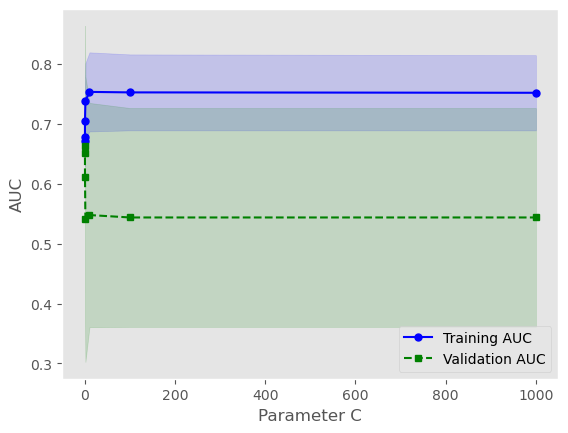

In [941]:
param_range =[0.001, 0.01, 0.1, 1.0, 10.0, 100.0,1000]
display_val_curve(X_train_pca,y_train,retrain_logreg_pca,param_range,param_name="C")

**1.3.:Feature Selection using the hierarchical clustering method**

<AxesSubplot: >

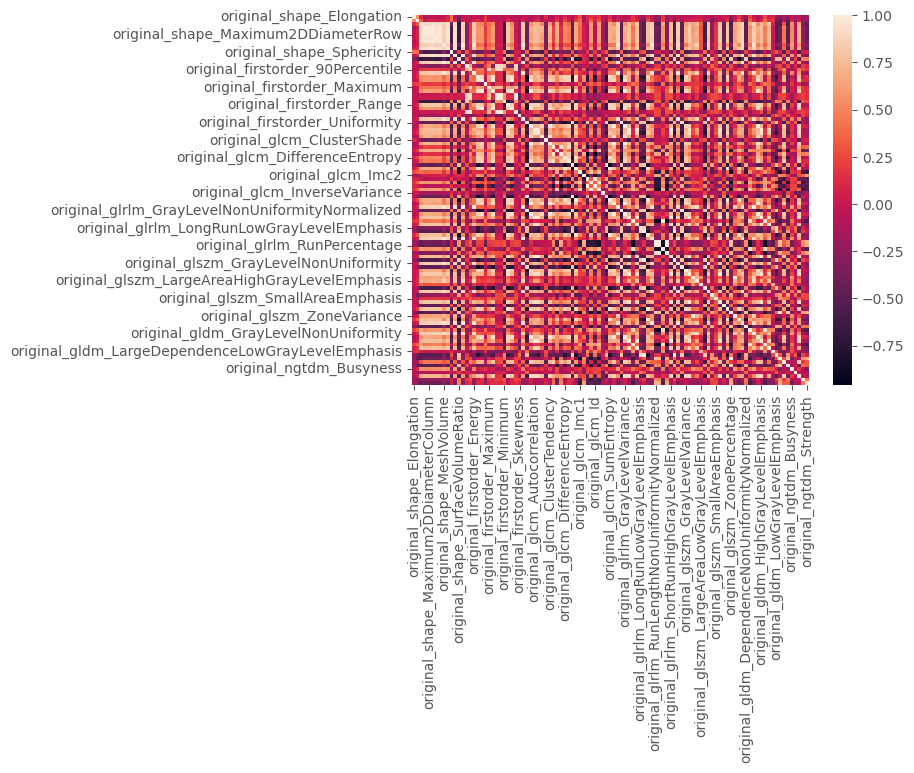

In [93]:
#see correlations
import seaborn as sns
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

sns.heatmap(train_scaled.corr())

In [146]:
def plot_cluster_hierarchy(train_scaled):
    fig, ax= plt.subplots(figsize=(10,6))
    corr = spearmanr(train_scaled).correlation

    # Ensure the correlation matrix is symmetric
    corr = (corr + corr.T) / 2
    np.fill_diagonal(corr, 1)

    # We convert the correlation matrix to a distance matrix before performing
    # hierarchical clustering using Ward's linkage.
    distance_matrix = 1 - np.abs(corr)
    dist_linkage = hierarchy.ward(squareform(distance_matrix))
    dendro = hierarchy.dendrogram(
        dist_linkage, labels=train_scaled.columns.tolist(), ax=ax, leaf_rotation=90
    )
    dendro_idx = np.arange(0, len(dendro["ivl"]))

    return dist_linkage 

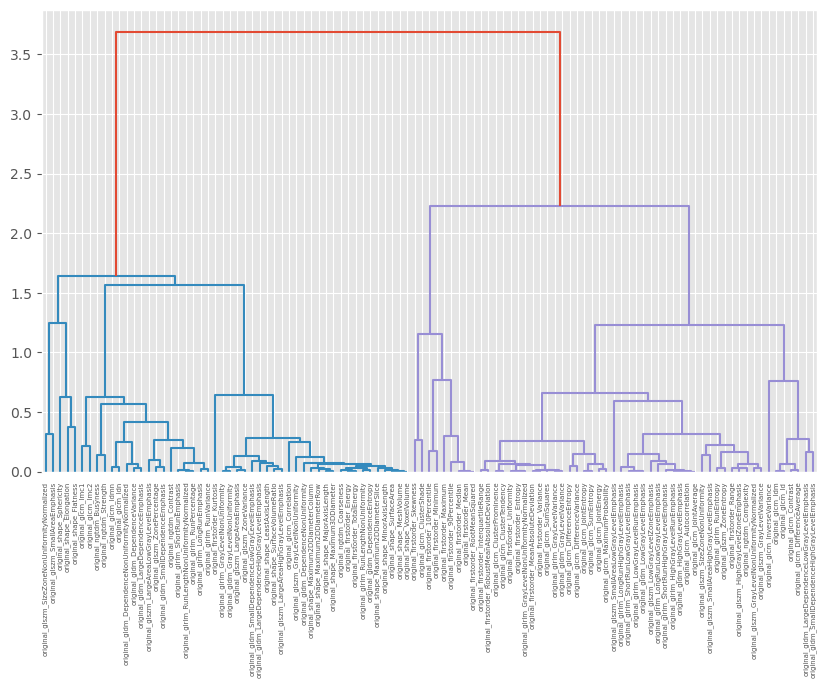

In [148]:
dist_linkage=plot_cluster_hierarchy(train_scaled)
#plt.xticks(fontweight='bold')
plt.savefig('plt.png', format='png', bbox_inches='tight')
plt.savefig('plt.jpg', format='jpg', bbox_inches='tight')

In [945]:
def select_features(dist_linkage, cluster_threshold):
    from collections import defaultdict
    cluster_ids = hierarchy.fcluster(dist_linkage, cluster_threshold, criterion="distance")
    cluster_id_to_feature_ids = defaultdict(list)
    for idx, cluster_id in enumerate(cluster_ids):
        cluster_id_to_feature_ids[cluster_id].append(idx)
    selected_features_indices = [v[0] for v in cluster_id_to_feature_ids.values()]

    return selected_features_indices


In [946]:
Threshold=0.40

In [947]:
selected_features=select_features(dist_linkage, cluster_threshold=Threshold)
col_names = train_scaled.columns.to_list()
selected_features_names = [col_names[i] for i in selected_features ]
selected_features_names

['original_shape_Elongation',
 'original_shape_LeastAxisLength',
 'original_shape_Sphericity',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Entropy',
 'original_firstorder_Kurtosis',
 'original_firstorder_Skewness',
 'original_glcm_Autocorrelation',
 'original_glcm_Contrast',
 'original_glcm_Imc1',
 'original_glcm_Idmn',
 'original_glcm_InverseVariance',
 'original_glszm_SizeZoneNonUniformityNormalized',
 'original_glszm_SmallAreaLowGrayLevelEmphasis',
 'original_ngtdm_Busyness']

['original_shape_Elongation',
 'original_shape_LeastAxisLength',
 'original_shape_MajorAxisLength',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Entropy',
 'original_firstorder_Kurtosis',
 'original_firstorder_Range',
 'original_firstorder_Skewness',
 'original_glcm_Contrast',
 'original_glcm_Imc1',
 'original_glcm_InverseVariance',
 'original_glrlm_LongRunEmphasis',
 'original_glszm_SizeZoneNonUniformityNormalized',
 'original_glszm_SmallAreaLowGrayLevelEmphasis',
 'original_ngtdm_Busyness'] -- Second Run

['original_shape_Elongation',
 'original_shape_LeastAxisLength',
 'original_shape_Sphericity',
 'original_firstorder_10Percentile',
 'original_firstorder_90Percentile',
 'original_firstorder_Entropy',
 'original_firstorder_Kurtosis',
 'original_firstorder_Range',
 'original_firstorder_Skewness',
 'original_glcm_Contrast',
 'original_glcm_Imc1',
 'original_glcm_InverseVariance',
 'original_glszm_SizeZoneNonUniformityNormalized',
 'original_glszm_SmallAreaLowGrayLevelEmphasis',
 'original_ngtdm_Busyness']--3rd run

In [948]:
len(selected_features_names)

16

**Train Model with Selected Features**

In [949]:
#filter only selected featurees
X_train_selected = train_scaled.iloc[:, selected_features]
X_test_selected = test_scaled.iloc[:, selected_features]

In [950]:
get_logreg_params_FS, trial_logreg_FS = tune_LOGREG(X_train=X_train_selected, \
    y_train=y_train,params=logreg_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:12<00:00, 77.50trial/s, best loss: -0.6392156862745099]


In [951]:
logreg_best_params_FS = get_logreg_params_FS.copy()
logreg_best_params_FS

{'C': 0.0292820865813782}

**Retrain on whole training and make predictions**

In [952]:
clf_sel = LogisticRegression(**logreg_best_params_FS,class_weight="balanced", random_state=seed)
clf_sel.fit(X_train_selected, y_train)

LogisticRegression(C=0.0292820865813782, class_weight='balanced',
                   random_state=50)

In [953]:
prediction_prob_logreg_fs_train = clf_sel.predict_proba(X_train_selected)

print(
    "LogReg Train AUC score : {:.2f}".format(
        roc_auc_score(y_train,prediction_prob_logreg_fs_train[:,1])
    )
)

LogReg Train AUC score : 0.68


In [954]:
prediction_prob_logreg_fs = clf_sel.predict_proba(X_test_selected)
prediction_logreg_fs= clf_sel.predict(X_test_selected)
print(
    "LogReg Test AUC score: {:.2f}".format(
        roc_auc_score(y_test,prediction_prob_logreg_fs[:,1])
    )
)

LogReg Test AUC score: 0.79


In [955]:
print(classification_report(y_test,prediction_logreg_fs))

              precision    recall  f1-score   support

         0.0       0.96      0.62      0.75        42
         1.0       0.20      0.80      0.32         5

    accuracy                           0.64        47
   macro avg       0.58      0.71      0.54        47
weighted avg       0.88      0.64      0.71        47



**SVM Model**

In [956]:
def tune_SVM(X_train, y_train,params, max_evals,cv=kfold,random_state=seed):

    def train_SVM(params):
    
        params_ = {'C': params['C'],
                'gamma':params['gamma'],
                'kernel':params['kernel'],
                'degree':params['degree']
                }
                
        model_=SVC(**params_, class_weight="balanced",probability=True,random_state=seed)
            
        scores = cross_validate(model_,X_train,y_train, cv=cv, \
                                    scoring=("roc_auc"),return_train_score=True\
                                        ,return_estimator=True, n_jobs=-1)
            
        #get the mean for all k folds acc
        mean_scores = -1 *scores["test_score"].mean()

        return mean_scores

    trials= Trials()

    #get best hyperparams
    best_params= fmin(fn=train_SVM,
                space= params,
                algo= tpe.suggest,
                max_evals = max_evals,
                trials= trials,
                rstate=np.random.default_rng(random_state)
                )
    
    return best_params, trials

In [957]:
# def train_SVM(X_train,y_train,model,params): 
#     best_params = best_hyperparams(model,params, X_train, y_train, grid=True)
#     print(f"Best params: {best_params}")
#     model = SVC(**best_params, class_weight="balanced",probability=True,random_state=seed)
#     scores = cross_validate(model,X_train, y_train, cv=kfold, \
#                             scoring=("roc_auc","average_precision"),return_train_score=True\
#                                 ,return_estimator=True, n_jobs=-1)
#     return scores,best_params

**2.1 : All Features**

In [958]:
# svm_space={'C': [0.1,1.0,10,100,1000], 
#             'gamma': [0.001,0.01,0.1,1.0],    # ["scale","auto"],
#             'kernel': ["rbf","poly","sigmoid"],
#             'degree':[1,2,3,4,5],
#                  } 
svm_space={'C': hp.uniform("C",0.01,100), 
        'gamma': hp.uniform("gamma",0.001,1.0),
        'kernel':hp.choice("kernel",["linear","rbf","poly","sigmoid"]),
        'degree':hp.uniform("degree",2,5),
                }  #hp.choice("C",[0.001,0.01,0.1])

In [959]:
get_svm_params_all, trial_svm_all = tune_SVM(X_train=train_scaled, \
    y_train=y_train,params=svm_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:21<00:00, 45.92trial/s, best loss: -0.6651218062982769]


In [960]:
get_svm_params_all

{'C': 0.2824605127142124,
 'degree': 3.633659180632866,
 'gamma': 0.06850978614425478,
 'kernel': 3}

Text(0.5, 0, 'sample')

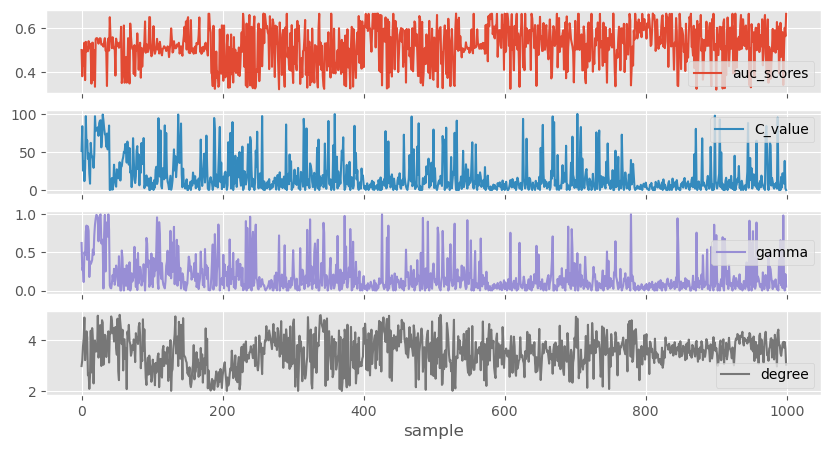

In [961]:
svm_tpe_results=np.array([[-1*x['result']['loss'],x['misc']['vals']['C'][0],x['misc']['vals']['gamma'][0],x['misc']['vals']['degree'][0]]for x in trial_svm_all.trials])
svm_tpe_results_df=pd.DataFrame(svm_tpe_results, columns=["auc_scores","C_value","gamma","degree"])
svm_tpe_results_df.plot(subplots=True,figsize=(10, 5))
plt.xlabel("sample")

In [962]:
svm_best_params_all=get_svm_params_all.copy()
#C=[0.01,0.1,1.0,10,100]
#gamma=["scale","auto"]
kernel=["linear","rbf","poly","sigmoid"]
#svm_best_params["C"]= C[best["C"]]
#svm_best_params["gamma"]= gamma[get_svm_params_all["gamma"]]
svm_best_params_all["kernel"]= kernel[get_svm_params_all["kernel"]]
svm_best_params_all

{'C': 0.2824605127142124,
 'degree': 3.633659180632866,
 'gamma': 0.06850978614425478,
 'kernel': 'sigmoid'}

In [963]:
# # svm_param={'C': [1,2,3,4,5], 
# #             'gamma': ["scale","auto"],
# #             'kernel': ["rbf","poly","sigmoid"],
# #             'degree':[2,3,4,5],
# #                  } 

# svm_param={'C': [0.1,1.0,10,100,1000], 
#             'gamma': [0.001,0.01,0.1,1.0],    # ["scale","auto"],
#             'kernel': ["rbf","poly","sigmoid"],
#             'degree':[1,2,3,4,5],
#                  } 

# svm_model =  SVC(class_weight="balanced",probability=True, random_state=seed)
# svm_results_all,svm_best_params = train_SVM(train_scaled,y_train, svm_model, svm_param)

In [964]:
# print(f'AUC:{svm_results_all["test_roc_auc"].mean()} +- {svm_results_all["test_roc_auc"].std()}')
# print(f'Avg Precision:{svm_results_all["test_average_precision"].mean()} +- {svm_results_all["test_average_precision"].std()}')

In [965]:
#retrain with all training 
#svm_best_params = {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
retrain_svm = SVC(**svm_best_params_all, class_weight="balanced",probability=True, random_state=seed)
retrain_svm.fit(train_scaled, y_train)

SVC(C=0.2824605127142124, class_weight='balanced', degree=3.633659180632866,
    gamma=0.06850978614425478, kernel='sigmoid', probability=True,
    random_state=50)

In [966]:
#make predictions
svm_test_pred = retrain_svm.predict(test_scaled)
svm_train_prob =  retrain_svm.predict_proba(train_scaled)
svm_test_prob =  retrain_svm.predict_proba(test_scaled)
print (f"SVM Train AUC All Features: {roc_auc_score(y_train, svm_train_prob[:,1])}")
print (f"SVM Test AUC All Features : {roc_auc_score(y_test, svm_test_prob[:,1])}")

SVM Train AUC All Features: 0.34036144578313254
SVM Test AUC All Features : 0.1380952380952381


In [967]:
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.60      0.74        42
         1.0       0.19      0.80      0.31         5

    accuracy                           0.62        47
   macro avg       0.58      0.70      0.52        47
weighted avg       0.88      0.62      0.69        47



In [968]:
confusion_matrix(y_test,svm_test_pred)

array([[25, 17],
       [ 1,  4]])

**2.2.: SVM Model+PCA**

In [969]:
get_svm_params_pca, trial_svm_pca = tune_SVM(X_train=X_train_pca, \
    y_train=y_train,params=svm_space, max_evals=1000,
    cv=kfold,random_state=seed)


100%|██████████| 1000/1000 [00:17<00:00, 57.06trial/s, best loss: -0.6739453357100416]


In [970]:
get_svm_params_pca

{'C': 30.082410581780145,
 'degree': 3.4175333498265537,
 'gamma': 0.6786816698267467,
 'kernel': 2}

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

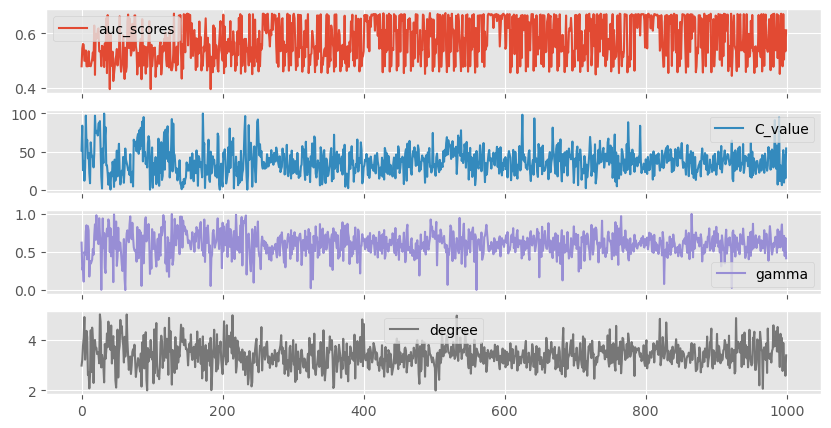

In [971]:
svm_tpe_results=np.array([[-1*x['result']['loss'],x['misc']['vals']['C'][0],x['misc']['vals']['gamma'][0],x['misc']['vals']['degree'][0]]for x in trial_svm_pca.trials])
svm_tpe_results_df=pd.DataFrame(svm_tpe_results, columns=["auc_scores","C_value","gamma","degree"])
svm_tpe_results_df.plot(subplots=True,figsize=(10, 5))

In [972]:
svm_best_params_pca=get_svm_params_pca.copy()
svm_best_params_pca["kernel"]= kernel[get_svm_params_pca["kernel"]]
svm_best_params_pca

{'C': 30.082410581780145,
 'degree': 3.4175333498265537,
 'gamma': 0.6786816698267467,
 'kernel': 'poly'}

In [973]:
#retrain with all training 
#svm_best_params1 = {'C': 3, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
retrain_svm_pca= SVC(**svm_best_params_pca, class_weight="balanced",probability=True, random_state=seed)
retrain_svm_pca.fit(X_train_pca, y_train)

SVC(C=30.082410581780145, class_weight='balanced', degree=3.4175333498265537,
    gamma=0.6786816698267467, kernel='poly', probability=True, random_state=50)

In [974]:
#make predictions
svm_test_pred_pca = retrain_svm_pca.predict(X_test_pca)
svm_train_prob_pca =  retrain_svm_pca.predict_proba(X_train_pca)
svm_test_prob_pca =  retrain_svm_pca.predict_proba(X_test_pca)
print (f"SVM Train AUC All Features: {roc_auc_score(y_train, svm_train_prob_pca[:,1])}")
print (f"SVM Test AUC All Features: {roc_auc_score(y_test, svm_test_prob_pca[:,1])}")

SVM Train AUC All Features: 0.0
SVM Test AUC All Features: 0.43809523809523815


In [975]:
print(classification_report(y_test,svm_test_pred_pca))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        42
         1.0       0.29      0.40      0.33         5

    accuracy                           0.83        47
   macro avg       0.61      0.64      0.62        47
weighted avg       0.86      0.83      0.84        47



In [976]:
confusion_matrix(y_test,svm_test_pred_pca)

array([[37,  5],
       [ 3,  2]])

**2.3: Feature Selection**

In [977]:
get_svm_params_FS, trial_svm_FS = tune_SVM(X_train=X_train_selected, \
    y_train=y_train,params=svm_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:17<00:00, 56.11trial/s, best loss: -0.6489601901366606]


In [978]:
get_svm_params_FS

{'C': 72.45815054360853,
 'degree': 3.6994098012288488,
 'gamma': 0.024298464079221167,
 'kernel': 2}

In [979]:
svm_best_params_FS=get_svm_params_FS.copy()
svm_best_params_FS["kernel"]= kernel[get_svm_params_FS["kernel"]]
svm_best_params_FS

{'C': 72.45815054360853,
 'degree': 3.6994098012288488,
 'gamma': 0.024298464079221167,
 'kernel': 'poly'}

In [980]:
def refit_model(model, X_train, y_train, X_test, y_test):
    #test_auc_scores=[]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob_train = model.predict_proba(X_train)
    y_pred_prob_test = model.predict_proba(X_test)
    train_auc = roc_auc_score(y_train, y_pred_prob_train[:,1])
    test_auc = roc_auc_score(y_test, y_pred_prob_test[:,1])
    return train_auc,test_auc,y_pred

In [981]:
svm_fs = SVC(**svm_best_params_FS, class_weight="balanced",probability=True, random_state=seed)
svm_refits_fs_train_auc,svm_refits_fs_test_auc ,svm_fs_pred = refit_model(svm_fs,X_train_selected,y_train,X_test_selected,y_test)

In [982]:
print (f"SVM Train AUC with FS : {svm_refits_fs_train_auc}")
print (f"SVM Test AUC with FS: {svm_refits_fs_test_auc }")

SVM Train AUC with FS : 0.29986613119143246
SVM Test AUC with FS: 0.2142857142857143


In [983]:
confusion_matrix(y_test, svm_fs_pred)

array([[34,  8],
       [ 1,  4]])

In [984]:
print(classification_report(y_test, svm_fs_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88        42
         1.0       0.33      0.80      0.47         5

    accuracy                           0.81        47
   macro avg       0.65      0.80      0.68        47
weighted avg       0.90      0.81      0.84        47



In [985]:
# param_range =[1,2,3,4,5]
# display_val_curve(X_train_transformed,y_train,svm_model,param_range,param_name="C")

**3. XGBoost Model**

In [986]:
class_weights = y_train.value_counts()[0]/y_train.value_counts()[1]
class_weights

9.222222222222221

In [987]:
class_weights = y_train.value_counts()[0]/y_train.value_counts()[1]

def tune_XGB(X_train, y_train,params, max_evals,cv=kfold,random_state=seed):

    def train_XGB(params):
    
        params_ = {'max_depth': params['max_depth'],
                'n_estimators':params['n_estimators'],
                'learning_rate':params['learning_rate'],
                'subsample':params['subsample'],
                'min_child_weight':params['min_child_weight'],
                'colsample_bytree':params['colsample_bytree']
                }

        model_=xgboost.XGBClassifier(**params_,n_jobs=-1,scale_pos_weight=class_weights,random_state=seed)
            
        scores = cross_validate(model_,X_train,y_train, cv=cv, \
                                    scoring=("roc_auc"),return_train_score=True\
                                        ,return_estimator=True, n_jobs=-1)
            
        #get the mean for all k folds acc
        mean_scores = -1 *scores["test_score"].mean()

        return mean_scores

    trials= Trials()

    #get best hyperparams
    best_params= fmin(fn=train_XGB,
                space= params,
                algo= tpe.suggest,
                max_evals = max_evals,
                trials= trials,
                rstate=np.random.default_rng(random_state)
                )
    
    return best_params, trials

**3.1. XGB: All Features**

In [988]:
xgb_space={'learning_rate': hp.uniform("learning_rate",0.001,0.1), 
        'n_estimators':hp.randint("n_estimators",5,50),
        'max_depth':hp.randint("max_depth",2,50),
        'subsample':hp.uniform("subsample",0.5,0.8),
        'min_child_weight':hp.uniform("min_child_weight",0.1,10),
        'colsample_bytree':hp.uniform("colsample_bytree",0.5,0.8),
        'colsample_bylevel':hp.uniform("colsample_bylevel",0.5,0.8),
                } 

# xgb_space= {'max_depth': [2,4,6,8],
#           "n_estimators":[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80],
#         'learning_rate': [0.001,0.01, 0.1,0.15,0.2,0.25],
#         'subsample': [0.5,0.6,0.7,0.8,0.9],
#         'colsample_bytree': [0.5,0.6,0.7,0.8,0.9],
#         "gamma":[0.1,0.3,4.0,0.5,0.7],
#         "min_child_weight":[5,6,7,8],
#             #"lambda":randint(1,3),
#             }

get_xgb_params_all, trial_xgb_all = tune_XGB(X_train=train_scaled, \
    y_train=y_train,params=xgb_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:36<00:00, 27.19trial/s, best loss: -0.709313725490196]


In [989]:
get_xgb_params_all

{'colsample_bylevel': 0.6469808277632616,
 'colsample_bytree': 0.7771039346796395,
 'learning_rate': 0.06825753508946246,
 'max_depth': 45,
 'min_child_weight': 9.36723675532816,
 'n_estimators': 5,
 'subsample': 0.5049664528826252}

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

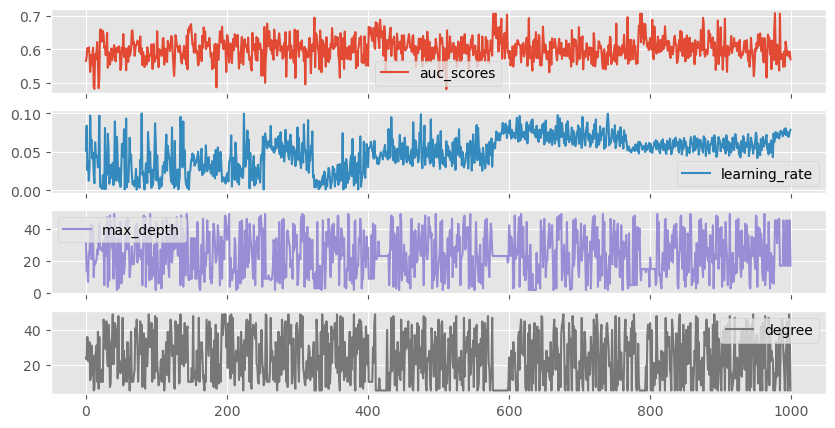

In [990]:
xgb_tpe_results=np.array([[-1*x['result']['loss'],x['misc']['vals']['learning_rate'][0],x['misc']['vals']['max_depth'][0],x['misc']['vals']['n_estimators'][0]]for x in trial_xgb_all.trials])
xgb_tpe_results_df=pd.DataFrame(xgb_tpe_results, columns=["auc_scores","learning_rate","max_depth","degree"])
xgb_tpe_results_df.plot(subplots=True,figsize=(10, 5))

In [991]:
retrain_xgb_all = xgboost.XGBClassifier(**get_xgb_params_all,scale_pos_weight=class_weights,n_jobs=-1, random_state=seed)
xgb_refits_all_train_auc,xgb_refits_all_test_auc ,xgb_all_pred = refit_model(retrain_xgb_all,train_scaled,y_train,test_scaled,y_test)

In [992]:
print (f"XGB Train AUC  All Features: {xgb_refits_all_train_auc}")
print (f"XGB Test AUC  All Features: {xgb_refits_all_test_auc}")

XGB Train AUC  All Features: 0.8217871485943775
XGB Test AUC  All Features: 0.8952380952380953


In [993]:
confusion_matrix(y_test,xgb_all_pred)

array([[36,  6],
       [ 2,  3]])

In [994]:
print(classification_report(y_test,xgb_all_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90        42
         1.0       0.33      0.60      0.43         5

    accuracy                           0.83        47
   macro avg       0.64      0.73      0.66        47
weighted avg       0.88      0.83      0.85        47



In [995]:
# def permutation_importance(estimator, X, y, n_repeat=100):
#   #used on already trained model
#   baseline_score = estimator.score(X, y)
#   scores=np.zeros((X.shape[1],n_repeat))
#   for f_idx in range(X.shape[1]):
#       for repeat in range(n_repeat):
#           X_new = X.copy()
#           X_new[:, f_idx] = np.random.shuffle(X[:, f_idx])
#           feature_score = estimator.score(X_new, y)
#           scores[f_idx, repeat] = baseline_score - feature_score

**3.2: XGB Model+PCA**

In [996]:
get_xgb_params_pca, trial_xgb_pca = tune_XGB(X_train=X_train_pca, \
    y_train=y_train,params=xgb_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:21<00:00, 47.07trial/s, best loss: -0.6957516339869281]


In [997]:
retrain_xgb_pca= xgboost.XGBClassifier(**get_xgb_params_pca,scale_pos_weight=class_weights,n_jobs=-1, random_state=seed)
xgb_refits_pca_train_auc,xgb_refits_pca_test_auc ,xgb_pca_pred = refit_model(retrain_xgb_pca,X_train_pca,y_train,X_test_pca,y_test)


In [998]:
print (f"XGB Train AUC  PCA Features: {xgb_refits_pca_train_auc}")
print (f"XGB Test AUC  PCA Features: {xgb_refits_pca_test_auc}")

XGB Train AUC  PCA Features: 0.9879518072289157
XGB Test AUC  PCA Features: 0.6523809523809524


In [999]:
confusion_matrix(y_test,xgb_pca_pred)

array([[41,  1],
       [ 5,  0]])

In [1000]:
print(classification_report(y_test,xgb_pca_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93        42
         1.0       0.00      0.00      0.00         5

    accuracy                           0.87        47
   macro avg       0.45      0.49      0.47        47
weighted avg       0.80      0.87      0.83        47



**XGB+ Feature Selection**

In [1001]:
get_xgb_params_FS, trial_xgb_FS = tune_XGB(X_train=X_train_selected, \
    y_train=y_train,params=xgb_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:23<00:00, 42.75trial/s, best loss: -0.7014408793820559]


In [1002]:
xgb_fs = xgboost.XGBClassifier(**get_xgb_params_FS,scale_pos_weight=class_weights,n_jobs=-1, random_state=seed)
xgb_refits_fs_train_auc, xgb_refits_fs_test_auc,xgb_fs_pred= refit_model(xgb_fs,X_train_selected,y_train,X_test_selected,y_test)

In [1003]:
print (f"XGB Train AUC with FS : {xgb_refits_fs_train_auc}")
print (f"XGB Test AUC with FS : {xgb_refits_fs_test_auc}")

XGB Train AUC with FS : 0.9839357429718876
XGB Test AUC with FS : 0.8809523809523809


In [1004]:
confusion_matrix(y_test,xgb_fs_pred)

array([[40,  2],
       [ 2,  3]])

In [1005]:
print(classification_report(y_test,xgb_fs_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        42
         1.0       0.60      0.60      0.60         5

    accuracy                           0.91        47
   macro avg       0.78      0.78      0.78        47
weighted avg       0.91      0.91      0.91        47



## Add Metadata Features with Radiomic Features and Refit ##

In [40]:
metadata.head()

,patient_id,course_num,lesion_location,lesion_num,duration_tx_to_imag (months),Fractions,mri_type,Primary Diagnosis,Age at Diagnosis,Gender,Secondary Diagnosis
0,103,1,r atrium,1.0,13.572133,5.0,0.0,Serous carcinoma,75.0,Female,metsovary
1,103,1,l temporal,2.0,13.572133,1.0,0.0,Serous carcinoma,75.0,Female,metsovary
2,105,1,rt temporal,1.0,2.103188,1.0,0.0,Squamous cell carcinoma,58.0,Male,brainmetskidney
3,114,1,lt temporal,1.0,33.453828,1.0,1.0,Invasive ductal carcinoma,60.0,Female,brainmetsbreast
4,115,1,rt occipital,1.0,25.336839,1.0,0.0,Renal cell carcinoma,68.0,Female,brainmetskidney


In [54]:
#metadata.to_excel("radiomics_metadata.xlsx")

In [51]:
#metadata.loc[test_data.index].to_excel("radiomics_test_data.xlsx")

In [41]:
useful_metadata = metadata[["Age at Diagnosis","Gender","duration_tx_to_imag (months)","Secondary Diagnosis"]]

In [42]:
numerical_df= useful_metadata.select_dtypes(include="float")
categorical_df= useful_metadata.select_dtypes(include="object")

In [43]:
categorical_dummies_df = pd.get_dummies(categorical_df)

In [44]:
new_numerical_traindata_df = pd.concat([train_data,numerical_df.loc[train_data.index]], axis=1)
new_numerical_testdata_df = pd.concat([test_data,numerical_df.loc[test_data.index]], axis=1)

In [45]:
scaler = MinMaxScaler()
new_numerical_traindata_scaled = scaler.fit_transform(new_numerical_traindata_df)
new_numerical_testdata_scaled= scaler.transform(new_numerical_testdata_df)

In [46]:
new_train_features_df = pd.concat([pd.DataFrame(new_numerical_traindata_scaled,columns=new_numerical_traindata_df.columns),
categorical_dummies_df.loc[train_data.index].reset_index(drop=True)], axis=1)
new_train_features_df

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,Secondary Diagnosis_brainmetskidney,Secondary Diagnosis_brainmetslung,Secondary Diagnosis_brainmetsmelanoma,Secondary Diagnosis_brainmetsovary,Secondary Diagnosis_brainmetsrenalcell,Secondary Diagnosis_brainmetsurothelial,Secondary Diagnosis_breastwithlargefrontalmet,Secondary Diagnosis_gkbrainmets2lesions,Secondary Diagnosis_metsovary,Secondary Diagnosis_rccbrainmets
0,0.625486,0.623870,0.147936,0.078696,0.107270,0.080400,0.060957,0.078109,0.002357,0.096954,...,0,1,0,0,0,0,0,0,0,0
1,0.785526,0.354822,0.118950,0.128702,0.138120,0.106426,0.136592,0.116211,0.005114,0.184036,...,0,1,0,0,0,0,0,0,0,0
2,0.849776,0.833265,0.210734,0.086736,0.127948,0.109365,0.103859,0.093552,0.005543,0.138070,...,0,0,0,0,0,0,0,0,0,0
3,0.689277,0.510895,0.235852,0.193130,0.199820,0.226790,0.184931,0.184273,0.017640,0.243618,...,0,0,0,0,0,0,0,0,0,0
4,0.893671,0.815446,0.716927,0.405944,0.505966,0.493089,0.390255,0.408617,0.252261,0.601821,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.553551,0.443497,0.151519,0.131968,0.142311,0.098811,0.122862,0.129921,0.005191,0.143647,...,0,0,0,0,0,0,0,0,0,0
180,0.897087,0.820557,0.317176,0.154848,0.182269,0.192667,0.172511,0.153671,0.021478,0.242692,...,0,0,0,0,0,0,0,1,0,0
181,0.810316,0.603937,0.203309,0.129416,0.142311,0.151516,0.142007,0.120912,0.009586,0.189679,...,0,0,1,0,0,0,0,0,0,0
182,0.399140,0.517464,0.142757,0.098447,0.107270,0.098811,0.059009,0.081849,0.002617,0.084199,...,0,1,0,0,0,0,0,0,0,0


In [47]:
new_test_features_df = pd.concat([pd.DataFrame(new_numerical_testdata_scaled,columns=new_numerical_testdata_df.columns),
categorical_dummies_df.loc[test_data.index].reset_index(drop=True)], axis=1)

In [48]:
new_test_features_df

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,Secondary Diagnosis_brainmetskidney,Secondary Diagnosis_brainmetslung,Secondary Diagnosis_brainmetsmelanoma,Secondary Diagnosis_brainmetsovary,Secondary Diagnosis_brainmetsrenalcell,Secondary Diagnosis_brainmetsurothelial,Secondary Diagnosis_breastwithlargefrontalmet,Secondary Diagnosis_gkbrainmets2lesions,Secondary Diagnosis_metsovary,Secondary Diagnosis_rccbrainmets
0,0.356724,4.142136e-01,5.169750e-02,0.021449,0.005378,0.004954,0.004643,0.018565,0.000113,0.012977,...,0,0,0,0,0,0,0,0,0,0
1,0.839956,4.441240e-01,7.372275e-02,0.042441,0.048372,0.044557,0.048626,0.040315,0.000750,0.075818,...,0,1,0,0,0,0,0,0,0,0
2,1.000000,5.270463e-01,6.991679e-02,0.025449,0.026481,0.033696,0.022862,0.025867,0.000471,0.064444,...,0,0,0,0,0,0,0,0,0,0
3,0.682052,5.411404e-01,6.120961e-01,0.534354,0.678508,0.575270,0.575479,0.508682,0.250141,0.650914,...,0,0,0,0,0,0,0,0,0,0
4,0.504921,6.060563e-01,1.854529e-01,0.113799,0.142311,0.131089,0.075354,0.107367,0.005174,0.116053,...,0,0,0,0,0,0,0,0,0,0
5,0.978196,7.884097e-01,1.650122e-01,0.064512,0.091134,0.085685,0.085063,0.071594,0.003143,0.122450,...,0,0,1,0,0,0,0,0,0,0
6,0.816488,6.541518e-01,3.564697e-01,0.235581,0.258404,0.258513,0.260907,0.228855,0.044773,0.333944,...,0,1,0,0,0,0,0,0,0,0
7,0.715428,6.651718e-01,1.775226e-01,0.093862,0.093020,0.110813,0.103859,0.091296,0.004007,0.127724,...,0,0,0,0,0,0,0,0,0,0
8,0.407329,3.259757e-16,7.347603e-17,0.072721,0.022784,0.062961,0.066585,0.054104,0.000935,0.062440,...,0,1,0,0,0,0,0,0,0,0
9,0.545339,5.592188e-01,6.846351e-02,0.020235,0.026481,0.004954,0.022862,0.018565,0.000202,0.024977,...,0,0,0,0,1,0,0,0,0,0


## Logistic Regression ##

### All Features ###

In [1014]:
get_logreg_params_all_new, trial_logreg_all_new = tune_LOGREG(X_train=new_train_features_df, \
    y_train=y_train,params=logreg_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:20<00:00, 49.58trial/s, best loss: -0.6635472370766489]


In [1015]:
get_logreg_params_all_new

{'C': 0.015759791558116257}

In [1016]:
retrain_logreg_new = LogisticRegression(**get_logreg_params_all_new,class_weight="balanced",\
                                    n_jobs=-1, max_iter=10000, random_state=seed)

logreg_refits_all_train_auc_new, logreg_refits_all_test_auc_new,logreg_all_pred_new= refit_model(retrain_logreg_new,new_train_features_df,\
                                                                                                y_train,new_test_features_df,y_test)


#retrain_logreg_new.fit(new_train_features_df, y_train)

In [1017]:
print (f"LOGREG Train AUC All Features with Metadata: {logreg_refits_all_train_auc_new}")
print (f"LOGREG Test AUC All Features with Metadata:  {logreg_refits_all_test_auc_new}")

LOGREG Train AUC All Features with Metadata: 0.7617135207496654
LOGREG Test AUC All Features with Metadata:  0.8428571428571429


In [1018]:
confusion_matrix(y_test,logreg_all_pred_new)

array([[32, 10],
       [ 1,  4]])

In [1019]:
print(classification_report(y_test,logreg_all_pred_new))

              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85        42
         1.0       0.29      0.80      0.42         5

    accuracy                           0.77        47
   macro avg       0.63      0.78      0.64        47
weighted avg       0.90      0.77      0.81        47



### LOGREG + PCA ###

In [1020]:
#col_transform1=make_pipeline(MinMaxScaler(),PCA(n_components=10))
pca= PCA(n_components=10)
X_train_pca_new= pca.fit_transform(new_train_features_df)
X_test_pca_new= pca.transform(new_test_features_df)

get_logreg_params_pca_new, trial_logreg_pca_new = tune_LOGREG(X_train=X_train_pca_new, \
    y_train=y_train,params=logreg_space, max_evals=1000,
    cv=kfold,random_state=seed)


#logreg_best_params1 = {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
retrain_logreg_pca_new = LogisticRegression(**get_logreg_params_pca_new,class_weight="balanced",\
                                        n_jobs=-1, max_iter=10000, random_state=seed)

logreg_pca_train_auc_new, logreg_pca_test_auc_new,logreg_pca_testpred_new= refit_model(retrain_logreg_pca_new,X_train_pca_new,\
                                                                                                y_train,X_test_pca_new,y_test)

print (f"LOGREG Train AUC PCA with Metadata: {logreg_pca_train_auc_new}")
print (f"LOGREG Test AUC PCA with Metadata: {logreg_pca_test_auc_new}")

  1%|▏         | 14/1000 [00:00<00:07, 133.53trial/s, best loss: -0.591146761734997]100%|██████████| 1000/1000 [00:09<00:00, 104.18trial/s, best loss: -0.6622103386809269]
LOGREG Train AUC PCA with Metadata: 0.7416331994645248
LOGREG Test AUC PCA with Metadata: 0.838095238095238


In [1021]:

confusion_matrix(y_test,logreg_pca_testpred_new)

array([[32, 10],
       [ 1,  4]])

In [1022]:
print(classification_report(y_test,logreg_pca_testpred_new))

              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85        42
         1.0       0.29      0.80      0.42         5

    accuracy                           0.77        47
   macro avg       0.63      0.78      0.64        47
weighted avg       0.90      0.77      0.81        47



### LogReg + Feature Selection ###

In [1023]:
train_scaled.shape

(184, 105)

In [1024]:
cat_dummies_cols = list(new_train_features_df.loc[:,"Gender_Female":].columns)

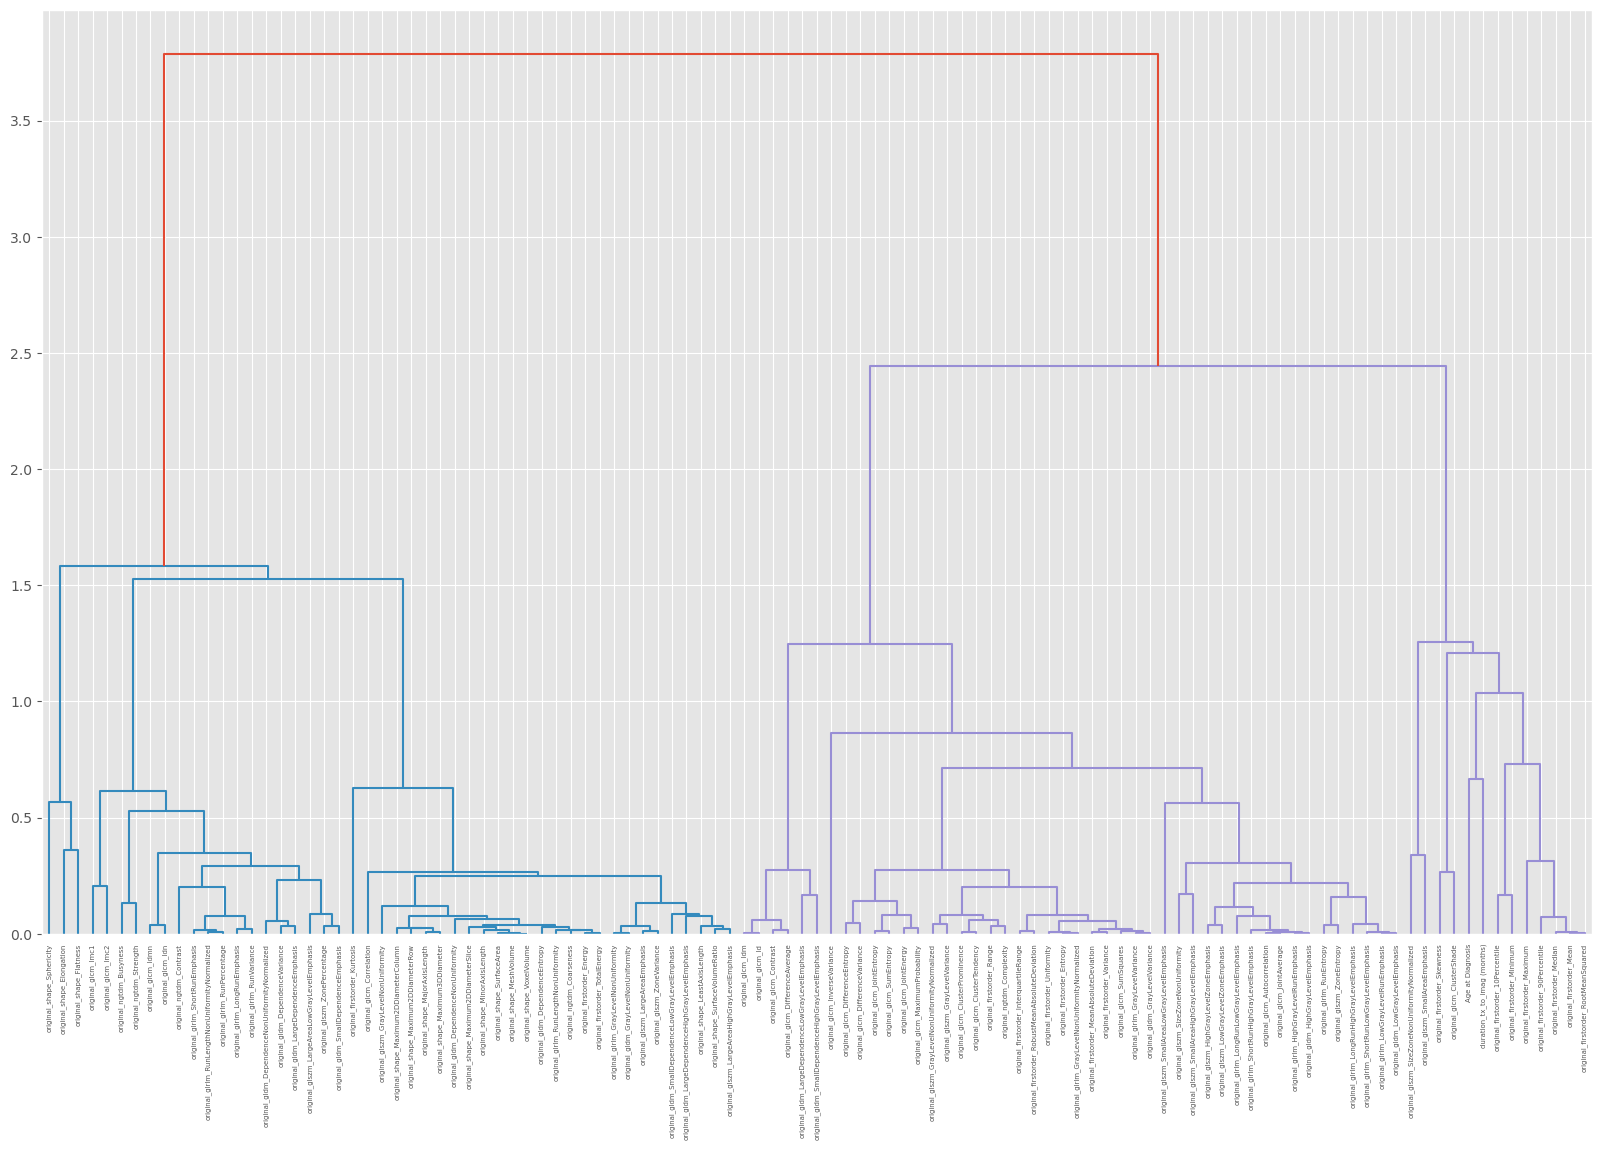

In [1025]:
dist_linkage_new=plot_cluster_hierarchy(new_train_features_df.loc[:,:"duration_tx_to_imag (months)"])


In [1026]:
selected_features_new=select_features(dist_linkage_new, cluster_threshold=Threshold)
col_names_new = new_train_features_df.loc[:,:"duration_tx_to_imag (months)"].columns.to_list()
selected_features_names_new = [col_names_new[i] for i in selected_features_new]
len(selected_features_names_new)

18

In [1027]:
#filter only selected featurees
X_train_selected_new = new_train_features_df[selected_features_names_new+cat_dummies_cols]
X_test_selected_new = new_test_features_df[selected_features_names_new+cat_dummies_cols]

In [1028]:
X_train_selected_new.shape,X_test_selected_new.shape

((184, 34), (47, 34))

In [1029]:
get_logreg_params_FS_new, trial_logreg_FS_new = tune_LOGREG(X_train=X_train_selected_new, \
    y_train=y_train,params=logreg_space, max_evals=1000,
    cv=kfold,random_state=seed)


#logreg_best_params1 = {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
retrain_logreg_FS_new = LogisticRegression(**get_logreg_params_FS_new,class_weight="balanced",\
                                        n_jobs=-1, max_iter=10000, random_state=seed)

logreg_FS_train_auc_new, logreg_FS_test_auc_new,logreg_FS_testpred_new= refit_model(retrain_logreg_FS_new,X_train_selected_new,\
                                                                                                y_train,X_test_selected_new,y_test)

print (f"LOGREG Train AUC FS with Metadata: {logreg_FS_train_auc_new}")
print (f"LOGREG Test AUC FS with Metadata: {logreg_FS_test_auc_new}")

100%|██████████| 1000/1000 [00:14<00:00, 67.92trial/s, best loss: -0.6813428401663695]
LOGREG Train AUC FS with Metadata: 0.8624497991967872
LOGREG Test AUC FS with Metadata: 0.8238095238095238


In [1030]:
confusion_matrix(y_test,logreg_FS_testpred_new)

array([[36,  6],
       [ 1,  4]])

In [1031]:
print(classification_report(y_test,logreg_FS_testpred_new))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91        42
         1.0       0.40      0.80      0.53         5

    accuracy                           0.85        47
   macro avg       0.69      0.83      0.72        47
weighted avg       0.91      0.85      0.87        47



## SVM ##

### All Features ###

In [1032]:
get_svm_params_all_new, trial_svm_all_new = tune_SVM(X_train=new_train_features_df, \
    y_train=y_train,params=svm_space, max_evals=1000,
    cv=kfold,random_state=seed)


100%|██████████| 1000/1000 [00:26<00:00, 38.27trial/s, best loss: -0.7787284610814023]


In [1033]:
svm_best_params_all_new=get_svm_params_all_new.copy()
#C=[0.01,0.1,1.0,10,100]
#gamma=["scale","auto"]
kernel=["linear","rbf","poly","sigmoid"]
#svm_best_params["C"]= C[best["C"]]
#svm_best_params["gamma"]= gamma[get_svm_params_all["gamma"]]
svm_best_params_all_new["kernel"]= kernel[get_svm_params_all_new["kernel"]]
svm_best_params_all_new

{'C': 0.6699156561722631,
 'degree': 4.104150763443538,
 'gamma': 0.9876655935287862,
 'kernel': 'rbf'}

In [1034]:
#svm_best_params = {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
retrain_svm_new = SVC(**svm_best_params_all_new, class_weight="balanced",probability=True, random_state=seed)

svm_all_train_auc_new, svm_all_test_auc_new,svm_all_testpred_new= refit_model(retrain_svm_new,new_train_features_df,\
                                                                                                y_train,new_test_features_df,y_test)

print (f"SVM Train AUC ALL with Metadata: {svm_all_train_auc_new}")
print (f"SVM Test AUC ALL with Metadata: {svm_all_test_auc_new}")


SVM Train AUC ALL with Metadata: 1.0
SVM Test AUC ALL with Metadata: 0.7047619047619048


In [1035]:
confusion_matrix(y_test,svm_all_testpred_new)

array([[41,  1],
       [ 4,  1]])

In [1036]:
print(classification_report(y_test,svm_all_testpred_new))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        42
         1.0       0.50      0.20      0.29         5

    accuracy                           0.89        47
   macro avg       0.71      0.59      0.61        47
weighted avg       0.87      0.89      0.87        47



### SVM + PCA ###

In [1037]:
get_svm_params_pca_new, trial_svm_pca_new = tune_SVM(X_train=X_train_pca_new, \
    y_train=y_train,params=svm_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:19<00:00, 52.29trial/s, best loss: -0.7459893048128342]


In [1038]:
svm_best_params_pca_new=get_svm_params_pca_new.copy()
#C=[0.01,0.1,1.0,10,100]
#gamma=["scale","auto"]
kernel=["linear","rbf","poly","sigmoid"]
#svm_best_params["C"]= C[best["C"]]
#svm_best_params["gamma"]= gamma[get_svm_params_all["gamma"]]
svm_best_params_pca_new["kernel"]= kernel[get_svm_params_pca_new["kernel"]]
svm_best_params_pca_new

{'C': 47.8836009556206,
 'degree': 2.5671202834634954,
 'gamma': 0.47229913984217053,
 'kernel': 'poly'}

In [1039]:
retrain_svm_pca_new = SVC(**svm_best_params_pca_new, class_weight="balanced",probability=True, random_state=seed)

svm_pca_train_auc_new, svm_pca_test_auc_new,svm_pca_testpred_new= refit_model(retrain_svm_pca_new,X_train_pca_new,\
                                                                                                y_train,X_test_pca_new,y_test)

print (f"SVM Train AUC PCA with Metadata: {svm_pca_train_auc_new}")
print (f"SVM Test AUC PCA with Metadata: {svm_pca_test_auc_new}")

SVM Train AUC PCA with Metadata: 1.0
SVM Test AUC PCA with Metadata: 0.5857142857142857


In [1040]:
confusion_matrix(y_test,svm_pca_testpred_new)

array([[37,  5],
       [ 3,  2]])

In [1041]:
print(classification_report(y_test,svm_pca_testpred_new))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        42
         1.0       0.29      0.40      0.33         5

    accuracy                           0.83        47
   macro avg       0.61      0.64      0.62        47
weighted avg       0.86      0.83      0.84        47



### SVM + Feature Selection ###

In [1042]:
get_svm_params_FS_new, trial_svm_FS_new = tune_SVM(X_train=X_train_selected_new, \
    y_train=y_train,params=svm_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:17<00:00, 56.14trial/s, best loss: -0.804812834224599]


In [1043]:
svm_best_params_FS_new=get_svm_params_FS_new.copy()
#C=[0.01,0.1,1.0,10,100]
#gamma=["scale","auto"]
kernel=["linear","rbf","poly","sigmoid"]
#svm_best_params["C"]= C[best["C"]]
#svm_best_params["gamma"]= gamma[get_svm_params_all["gamma"]]
svm_best_params_FS_new["kernel"]= kernel[get_svm_params_FS_new["kernel"]]
svm_best_params_FS_new

{'C': 1.975327370942925,
 'degree': 2.876218186627506,
 'gamma': 0.9985065815167309,
 'kernel': 'rbf'}

In [1044]:
retrain_svm_FS_new = SVC(**svm_best_params_FS_new, class_weight="balanced",probability=True, random_state=seed)

svm_FS_train_auc_new, svm_FS_test_auc_new,svm_FS_testpred_new= refit_model(retrain_svm_FS_new,X_train_selected_new,\
                                                                                                y_train,X_test_selected_new,y_test)

print (f"SVM Train AUC FS with Metadata: {svm_FS_train_auc_new}")
print (f"SVM Test AUC FS with Metadata: {svm_FS_test_auc_new}")
#retrain_svm_FS_new.fit(X_train_selected_new, y_train)

SVM Train AUC FS with Metadata: 1.0
SVM Test AUC FS with Metadata: 0.7333333333333334


In [1045]:
confusion_matrix(y_test,svm_FS_testpred_new)

array([[41,  1],
       [ 3,  2]])

In [1046]:
print(classification_report(y_test,svm_FS_testpred_new))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        42
         1.0       0.67      0.40      0.50         5

    accuracy                           0.91        47
   macro avg       0.80      0.69      0.73        47
weighted avg       0.90      0.91      0.91        47




## XGBOOST ##

### All Features ###

In [1047]:
get_xgb_params_all_new, trial_xgb_all_new = tune_XGB(X_train=new_train_features_df, \
    y_train=y_train,params=xgb_space, max_evals=1000,
    cv=kfold,random_state=seed)

retrain_xgb_all_new = xgboost.XGBClassifier(**get_xgb_params_all_new,scale_pos_weight=class_weights,n_jobs=-1, random_state=seed)

xgb_all_train_auc_new, xgb_all_test_auc_new,xgb_all_testpred_new= refit_model(retrain_xgb_all_new,new_train_features_df,\
                                                                                                y_train,new_test_features_df,y_test)

print (f"XGB Train AUC ALL with Metadata: {xgb_all_train_auc_new}")
print (f"XGB Test AUC ALL with Metadata: {xgb_all_test_auc_new}")

100%|██████████| 1000/1000 [00:39<00:00, 25.39trial/s, best loss: -0.7302139037433155]
XGB Train AUC ALL with Metadata: 0.9779116465863453
XGB Test AUC ALL with Metadata: 0.7714285714285714


In [1048]:
confusion_matrix(y_test,xgb_all_testpred_new)

array([[41,  1],
       [ 2,  3]])

In [1049]:
print(classification_report(y_test,xgb_all_testpred_new))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        42
         1.0       0.75      0.60      0.67         5

    accuracy                           0.94        47
   macro avg       0.85      0.79      0.82        47
weighted avg       0.93      0.94      0.93        47



### XGB + PCA ###

In [1050]:
get_xgb_params_pca_new, trial_xgb_pca_new = tune_XGB(X_train=X_train_pca_new, \
    y_train=y_train,params=xgb_space, max_evals=1000,
    cv=kfold,random_state=seed)

retrain_xgb_pca_new = xgboost.XGBClassifier(**get_xgb_params_pca_new,scale_pos_weight=class_weights,n_jobs=-1, random_state=seed)

xgb_pca_train_auc_new, xgb_pca_test_auc_new,xgb_pca_testpred_new= refit_model(retrain_xgb_pca_new,X_train_pca_new,\
                                                                                                y_train,X_test_pca_new,y_test)

print (f"XGB Train AUC PCA with Metadata: {xgb_pca_train_auc_new}")
print (f"XGB Test AUC PCA with Metadata: {xgb_pca_test_auc_new}")

100%|██████████| 1000/1000 [00:21<00:00, 45.60trial/s, best loss: -0.7375816993464053]
XGB Train AUC PCA with Metadata: 0.9933065595716198
XGB Test AUC PCA with Metadata: 0.9238095238095239


In [1051]:
confusion_matrix(y_test,xgb_pca_testpred_new)

array([[40,  2],
       [ 3,  2]])

In [1052]:
print("Classification reports")
print(classification_report(y_test,xgb_pca_testpred_new))

Classification reports
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        42
         1.0       0.50      0.40      0.44         5

    accuracy                           0.89        47
   macro avg       0.72      0.68      0.69        47
weighted avg       0.88      0.89      0.89        47



### XGB + Feature Selection ###

In [1053]:
get_xgb_params_FS_new, trial_xgb_FS_new = tune_XGB(X_train=X_train_selected_new, \
    y_train=y_train,params=xgb_space, max_evals=1000,
    cv=kfold,random_state=seed)

retrain_xgb_FS_new = xgboost.XGBClassifier(**get_xgb_params_FS_new,scale_pos_weight=class_weights,n_jobs=-1, random_state=seed)


xgb_FS_train_auc_new, xgb_FS_test_auc_new,xgb_FS_testpred_new= refit_model(retrain_xgb_FS_new,X_train_selected_new,\
                                                                                                y_train,X_test_selected_new,y_test)

print (f"XGB Train AUC FS with Metadata: {xgb_FS_train_auc_new}")
print (f"XGB Test AUC FS with Metadata: {xgb_FS_test_auc_new}")

100%|██████████| 1000/1000 [00:26<00:00, 37.82trial/s, best loss: -0.7203505644682116]
XGB Train AUC FS with Metadata: 0.9926372155287818
XGB Test AUC FS with Metadata: 0.8666666666666667


In [1054]:
confusion_matrix(y_test,xgb_FS_testpred_new)

array([[42,  0],
       [ 5,  0]])

In [1055]:
print("Classification reports")
print(classification_report(y_test,xgb_FS_testpred_new))

Classification reports
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        42
         1.0       0.00      0.00      0.00         5

    accuracy                           0.89        47
   macro avg       0.45      0.50      0.47        47
weighted avg       0.80      0.89      0.84        47



## Create an extra categories of Features by assigning samples to one of the following groups ##


- Breast cancer
- Lung Cancer
- Others

In [1056]:
metadata[metadata["Primary Diagnosis"]=="Ductal carcinoma"]

,patient_id,course_num,lesion_location,lesion_num,duration_tx_to_imag (months),Fractions,mri_type,Primary Diagnosis,Age at Diagnosis,Gender,Secondary Diagnosis
49,274,1,rt occipital,1.0,29.116004,1.0,1.0,Ductal carcinoma,60.0,Female,brainmetsbreast
50,274,1,lt parietal,2.0,29.116004,1.0,0.0,Ductal carcinoma,60.0,Female,brainmetsbreast


In [1057]:
# map_features=["Adenocarcinoma of the breast","Adenocarcinoma of the lung, squamous cell carcinoma",
#               "Carcinoma","Carcinoma in the breast","Carcinoma of the lung","Ductal carcinoma",
#               "Endometrial carcinoma","Invasive ductal carcinoma","Invasive ductal carcinoma of Rt Breast",
#               "Large cell neuroendocrine carcinoma","Melanoma","Ovarian adenocarcinoma",
#               "Renal cell carcinoma","Serous carcinoma","Small cell carcinoma of lung",
#               "Squamous cell carcinoma","Urothelial carcinoma","Adenocarcinoma of the lung"]

# replacement = ["Breast","Lung",
#                "Others","Lung","Breast","Lung",
#                "Breast","Breast","Breast",
#                "Lung","Melanoma","Others",
#                "Kidney","Others","Lung",
#                "Others","Others","Lung"]

- Breast cancer
- Lung cancer
- Kidney cancer
- Melanona
- Colon cancer
- Others

In [1058]:
# Create a function to classify cancer types into three categories
def classify_cancer(cancer_name):
    keywords = {
        "Breast Cancer": ["Adenocarcinoma of the breast", "Carcinoma in the breast","Ductal carcinoma",\
            "Invasive ductal carcinoma","Invasive ductal carcinoma of Rt Breast",],
        "Lung Cancer": ["Adenocarcinoma of the lung, squamous cell carcinoma","Carcinoma of the lung",\
            "Adenocarcinoma of the lung","Small cell carcinoma of lung","Large cell neuroendocrine carcinoma"],
        # "others": ["Renal cell carcinoma","Melanoma","Squamous cell carcinoma","Ovarian adenocarcinoma","Carcinoma",\
        #     "Endometrial carcinoma","Serous carcinoma","Urothelial carcinoma"],
    }
    
    for category, keywords_list in keywords.items():
        for keyword in keywords_list:
            if keyword.lower() in cancer_name.lower():
                return category
    
    return "Others"

In [1059]:
useful_metadata_grp = metadata[["Age at Diagnosis","Gender","duration_tx_to_imag (months)","Primary Diagnosis","Secondary Diagnosis"]]
useful_metadata_grp["Category"] = useful_metadata_grp["Primary Diagnosis"].apply(classify_cancer)

In [1060]:
useful_metadata_grp.head()

,Age at Diagnosis,Gender,duration_tx_to_imag (months),Primary Diagnosis,Secondary Diagnosis,Category
0,75.0,Female,13.572133,Serous carcinoma,metsovary,Others
1,75.0,Female,13.572133,Serous carcinoma,metsovary,Others
2,58.0,Male,2.103188,Squamous cell carcinoma,brainmetskidney,Others
3,60.0,Female,33.453828,Invasive ductal carcinoma,brainmetsbreast,Breast Cancer
4,68.0,Female,25.336839,Renal cell carcinoma,brainmetskidney,Others


In [1061]:
# useful_metadata_grp.groupby(["Primary Diagnosis","Category"]).count()

In [1062]:
categorical_df_grp= useful_metadata_grp.drop(labels="Primary Diagnosis", axis=1).select_dtypes(include="object")
categorical_dummies_df_grp = pd.get_dummies(categorical_df_grp)

**Update the training and test data with new features**

In [1063]:
train_data_updated = pd.concat([pd.DataFrame(new_numerical_traindata_scaled,columns=new_numerical_traindata_df.columns),
categorical_dummies_df_grp.loc[train_data.index].reset_index(drop=True)], axis=1)

test_data_updated = pd.concat([pd.DataFrame(new_numerical_testdata_scaled,columns=new_numerical_testdata_df.columns),
categorical_dummies_df_grp.loc[test_data.index].reset_index(drop=True)], axis=1)

In [1064]:
train_data_updated.shape, test_data_updated.shape

((184, 126), (47, 126))

**4.1: XGBoost with Selected Features + Grouped Features**

In [1065]:
new_useful_features = selected_features_names_new+ list(train_data_updated.columns[-19:])
train_data_updated_fs = train_data_updated[new_useful_features]
test_data_updated_fs = test_data_updated[new_useful_features]

In [1066]:
get_xgb_params_gf, trial_xgb_gf = tune_XGB(X_train=train_data_updated_fs, \
    y_train=y_train,params=xgb_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:26<00:00, 37.22trial/s, best loss: -0.7424836601307189]


In [1067]:
retrain_xgb_gf = xgboost.XGBClassifier(**get_xgb_params_gf,scale_pos_weight=class_weights,n_jobs=-1, random_state=seed)

xgb_gf_train_auc_new, xgb_gf_test_auc_new,xgb_gf_testpred_new= refit_model(retrain_xgb_gf,train_data_updated_fs,\
                                                                                                y_train,test_data_updated_fs,y_test)

print (f"XGB Train AUC FS + Metadata+ Group Feature: {xgb_gf_train_auc_new}")
print (f"XGB Test AUC FS + Metadata+ Group Feature: {xgb_gf_test_auc_new}")
#retrain_xgb_gf.fit(train_data_updated_fs, y_train)

XGB Train AUC FS + Metadata+ Group Feature: 0.9839357429718876
XGB Test AUC FS + Metadata+ Group Feature: 0.8380952380952382


In [1068]:
confusion_matrix(y_test,xgb_gf_testpred_new)

array([[41,  1],
       [ 3,  2]])

In [1069]:
print(classification_report(y_test,xgb_gf_testpred_new))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        42
         1.0       0.67      0.40      0.50         5

    accuracy                           0.91        47
   macro avg       0.80      0.69      0.73        47
weighted avg       0.90      0.91      0.91        47



**4.2 : SVM + Selected Features + Grouped Features**

In [1070]:
get_svm_params_gf, trial_svm_gf = tune_SVM(X_train=train_data_updated_fs, \
                                            y_train=y_train,params=svm_space, max_evals=1000,
                                            cv=kfold,random_state=seed
                                            )

100%|██████████| 1000/1000 [00:18<00:00, 54.24trial/s, best loss: -0.7991978609625668]


In [1071]:
svm_best_params_gf=get_svm_params_gf.copy()
#C=[0.01,0.1,1.0,10,100]
#gamma=["scale","auto"]
kernel=["linear","rbf","poly","sigmoid"]
#svm_best_params["C"]= C[best["C"]]
#svm_best_params["gamma"]= gamma[get_svm_params_all["gamma"]]
svm_best_params_gf["kernel"]= kernel[get_svm_params_gf["kernel"]]
svm_best_params_gf

{'C': 2.2940963451502037,
 'degree': 4.10098402489901,
 'gamma': 0.980156738924377,
 'kernel': 'rbf'}

In [1072]:
retrain_svm_gf = SVC(**svm_best_params_gf, class_weight="balanced",\
                    probability=True, random_state=seed)

svm_gf_train_auc_new, svm_gf_test_auc_new,svm_gf_testpred_new= refit_model(retrain_svm_gf,
                                                                            train_data_updated_fs,\
                                                                            y_train,test_data_updated_fs,y_test)

print (f"SVM Train AUC FS + Metadata+ Group Feature: {svm_gf_train_auc_new}")
print (f"SVM Test AUC FS + Metadata+ Group Feature: {svm_gf_test_auc_new}")
#retrain_xgb_gf.fit(train_data_updated_fs, y_train)

#retrain_svm_gf.fit(train_data_updated_fs, y_train)

SVM Train AUC FS + Metadata+ Group Feature: 1.0
SVM Test AUC FS + Metadata+ Group Feature: 0.6666666666666666


In [1073]:
confusion_matrix(y_test,svm_gf_testpred_new)

array([[40,  2],
       [ 4,  1]])

In [1074]:
print(classification_report(y_test,svm_gf_testpred_new))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        42
         1.0       0.33      0.20      0.25         5

    accuracy                           0.87        47
   macro avg       0.62      0.58      0.59        47
weighted avg       0.85      0.87      0.86        47



**4.3: Logistic Regression + Selected Features + Grouped Features**

In [1075]:
get_logreg_params_gf, trial_logreg_gf = tune_LOGREG(X_train=train_data_updated_fs, \
    y_train=y_train,params=logreg_space, max_evals=1000,
    cv=kfold,random_state=seed)

100%|██████████| 1000/1000 [00:14<00:00, 67.06trial/s, best loss: -0.7015448603683897]


In [1076]:
retrain_logreg_gf = LogisticRegression(**get_logreg_params_gf,class_weight="balanced",
                                        random_state=seed, max_iter=10000)

logreg_gf_train_auc_new, logreg_gf_test_auc_new,logreg_gf_testpred_new= refit_model(retrain_logreg_gf,
                                                                            train_data_updated_fs,\
                                                                            y_train,test_data_updated_fs,y_test)

print (f"LOGREG Train AUC FS + Metadata+ Group Feature: {logreg_gf_train_auc_new}")
print (f"LOGREG Test AUC FS + Metadata+ Group Feature: {logreg_gf_test_auc_new}")

#retrain_logreg_gf.fit(train_data_updated_fs, y_train)

LOGREG Train AUC FS + Metadata+ Group Feature: 0.8744979919678715
LOGREG Test AUC FS + Metadata+ Group Feature: 0.819047619047619


In [1077]:
confusion_matrix(y_test,logreg_gf_testpred_new)

array([[36,  6],
       [ 1,  4]])

In [1078]:
print(classification_report(y_test,logreg_gf_testpred_new))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91        42
         1.0       0.40      0.80      0.53         5

    accuracy                           0.85        47
   macro avg       0.69      0.83      0.72        47
weighted avg       0.91      0.85      0.87        47

